# Notebook Contents

1. Abstract
2. Importing libraries
3. Loading data
4. Checking null values
5. Exploratory Data Analysis
6. Feature Engineering
7. Train and validation split
8. Training Models
9. Feature Selection
10. Hyper parameter tuning for the models
11. Alternate Method
12. CatBoost
13. Selecting the best model
14. Making predictions
15. SHAP values
16. Conclusion
17. Kaggle Competition score
18. Public kernels vs this notebook
19. Citations
20. License


# 1. Abstract

I am trying to predict if the employees are allowed or denied access to resources with the Amazon Database. Plotted graphs for seeing the trends in the dataset and similarity in test and train data. I used column transformations and methods for feature engineering. Feature Selection is performed using Recursive Elimination with Cross-Validation and built a few models, namely Random Forest Classifier, XGBoost, LightGBM and Catboost, for predicting the employees' access for a while.

# 2. Importing libraries

In [101]:
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np
import re
import math
import matplotlib.pyplot as plt

%pylab inline
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# 3. Loading Data

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
train = pd.read_csv('/content/drive/MyDrive/amazon-employee-access-challenge/train.csv')
train.head()

ACTION  RESOURCE  MGR_ID  ...  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE
0       1     39353   85475  ...            117906       290919     117908
1       1     17183    1540  ...            118536       308574     118539
2       1     36724   14457  ...            267952        19721     117880
3       1     36135    5396  ...            240983       290919     118322
4       1     42680    5905  ...            123932        19793     119325

[5 rows x 10 columns]

In [104]:
test = pd.read_csv('/content/drive/MyDrive/amazon-employee-access-challenge/test.csv')
test.head()

id  RESOURCE  MGR_ID  ...  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE
0   1     78766   72734  ...            118177        19721     117880
1   2     40644    4378  ...            122008       118398     118865
2   3     75443    2395  ...            301534       249618     118175
3   4     43219   19986  ...            136187       118960     120774
4   5     42093   50015  ...            300136       118424     118425

[5 rows x 10 columns]

Checking the number of rows and columns in the train dataset.

In [105]:
train.shape

(32769, 10)

Checking the number of rows and columns in the test dataset.

In [106]:
test.shape

(58921, 10)

Let's check the statistics of the train and test datasets and some parameters.

In [107]:
train.describe().transpose()

count           mean  ...       75%       max
ACTION            32769.0       0.942110  ...       1.0       1.0
RESOURCE          32769.0   42923.916171  ...   74189.0  312153.0
MGR_ID            32769.0   25988.957979  ...   42034.0  311696.0
ROLE_ROLLUP_1     32769.0  116952.627788  ...  117961.0  311178.0
ROLE_ROLLUP_2     32769.0  118301.823156  ...  118386.0  286791.0
ROLE_DEPTNAME     32769.0  118912.779914  ...  120535.0  286792.0
ROLE_TITLE        32769.0  125916.152644  ...  120006.0  311867.0
ROLE_FAMILY_DESC  32769.0  170178.369648  ...  235280.0  311867.0
ROLE_FAMILY       32769.0  183703.408893  ...  290919.0  308574.0
ROLE_CODE         32769.0  119789.430132  ...  119348.0  270691.0

[10 rows x 8 columns]

In [108]:
test.describe().transpose()

count           mean  ...       75%       max
id                58921.0   29461.000000  ...   44191.0   58921.0
RESOURCE          58921.0   39383.739482  ...   45481.0  312136.0
MGR_ID            58921.0   26691.645050  ...   46512.0  311779.0
ROLE_ROLLUP_1     58921.0  117028.638041  ...  117961.0  311178.0
ROLE_ROLLUP_2     58921.0  118316.334091  ...  118386.0  194897.0
ROLE_DEPTNAME     58921.0  118858.006721  ...  120410.0  277693.0
ROLE_TITLE        58921.0  126358.019993  ...  120006.0  311867.0
ROLE_FAMILY_DESC  58921.0  170455.861425  ...  234813.0  311867.0
ROLE_FAMILY       58921.0  179278.058960  ...  290919.0  308574.0
ROLE_CODE         58921.0  119707.754264  ...  119353.0  270691.0

[10 rows x 8 columns]

Understanding the type of values each column contains in the dataset.

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                58921 non-null  int64
 1   RESOURCE          58921 non-null  int64
 2   MGR_ID            58921 non-null  int64
 3   ROLE_ROLLUP_1     58921 non-null  int64
 4   ROLE_ROLLUP_2     58921 non-null  int64
 5   ROLE_DEPTNAME     58921 non-null  int64
 6   ROLE_TITLE        58921 non-null  int64
 7   ROLE_FAMILY_DESC  58921 non-null  int64
 8   ROLE_FAMILY       58921 non-null  int64
 9   ROLE_CODE         58921 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


# 4. Checking null values

In [111]:
#checking null values in train
train.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [112]:
#checking null values in test
test.isnull().sum()

id                  0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

No **Null values** are found in both train and test datasets.

Now, we will check for the **unique** values in the train and test datasets.

In [113]:
# count of unique values in train
train.apply(lambda x: len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [114]:
# count of unique values in test
test.apply(lambda x: len(x.unique()))

id                  58921
RESOURCE             4971
MGR_ID               4689
ROLE_ROLLUP_1         126
ROLE_ROLLUP_2         177
ROLE_DEPTNAME         466
ROLE_TITLE            351
ROLE_FAMILY_DESC     2749
ROLE_FAMILY            68
ROLE_CODE             351
dtype: int64

Here checking the unique values, we can see that there are some values in the test dataset that are not present in the train dataset. In future, we might consider this and feature engineer to model the data that is only present in test and not in train.

In [115]:
#copying the id column to a new variable, we need the id values to create submission.csv
test_id = test['id']
test_id.head()

0    1
1    2
2    3
3    4
4    5
Name: id, dtype: int64

Copying the id column to a new variable, we need the id values to create submission.csv

In [116]:
train_action = train['ACTION']
train_action.head()

0    1
1    1
2    1
3    1
4    1
Name: ACTION, dtype: int64

# 5. Exploratory Data Analysis

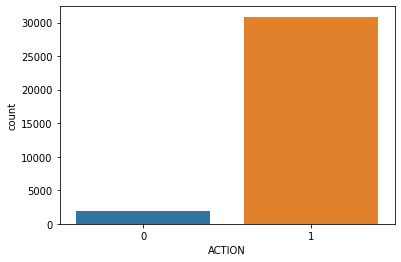

In [ ]:
sns.countplot(x="ACTION", data=train)

Plotted a count plot for checking the range of **0s and 1s** in the train dataset. 

In [ ]:
train_corr = train[['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',\
                      'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE', 'ACTION']].corr()
train_corr['ACTION'].sort_values(ascending=False)

ACTION              1.000000
ROLE_CODE           0.017147
ROLE_ROLLUP_2       0.005179
ROLE_FAMILY_DESC    0.003565
ROLE_DEPTNAME       0.001025
ROLE_FAMILY         0.000502
RESOURCE            0.000185
MGR_ID             -0.005167
ROLE_TITLE         -0.010169
ROLE_ROLLUP_1      -0.013702
Name: ACTION, dtype: float64

Checking the **correlation** with the target column, so the most correlated features can be dropped in the later stages.

In [ ]:
corr_matrix=train.corr()
corr_matrix['ACTION']

ACTION              1.000000
RESOURCE            0.000185
MGR_ID             -0.005167
ROLE_ROLLUP_1      -0.013702
ROLE_ROLLUP_2       0.005179
ROLE_DEPTNAME       0.001025
ROLE_TITLE         -0.010169
ROLE_FAMILY_DESC    0.003565
ROLE_FAMILY         0.000502
ROLE_CODE           0.017147
Name: ACTION, dtype: float64

None of the features are highly correlated to the **'ACTION'** column that is the **target** feature.

Plotting a pairplot to understand the **trends** in the feature values.

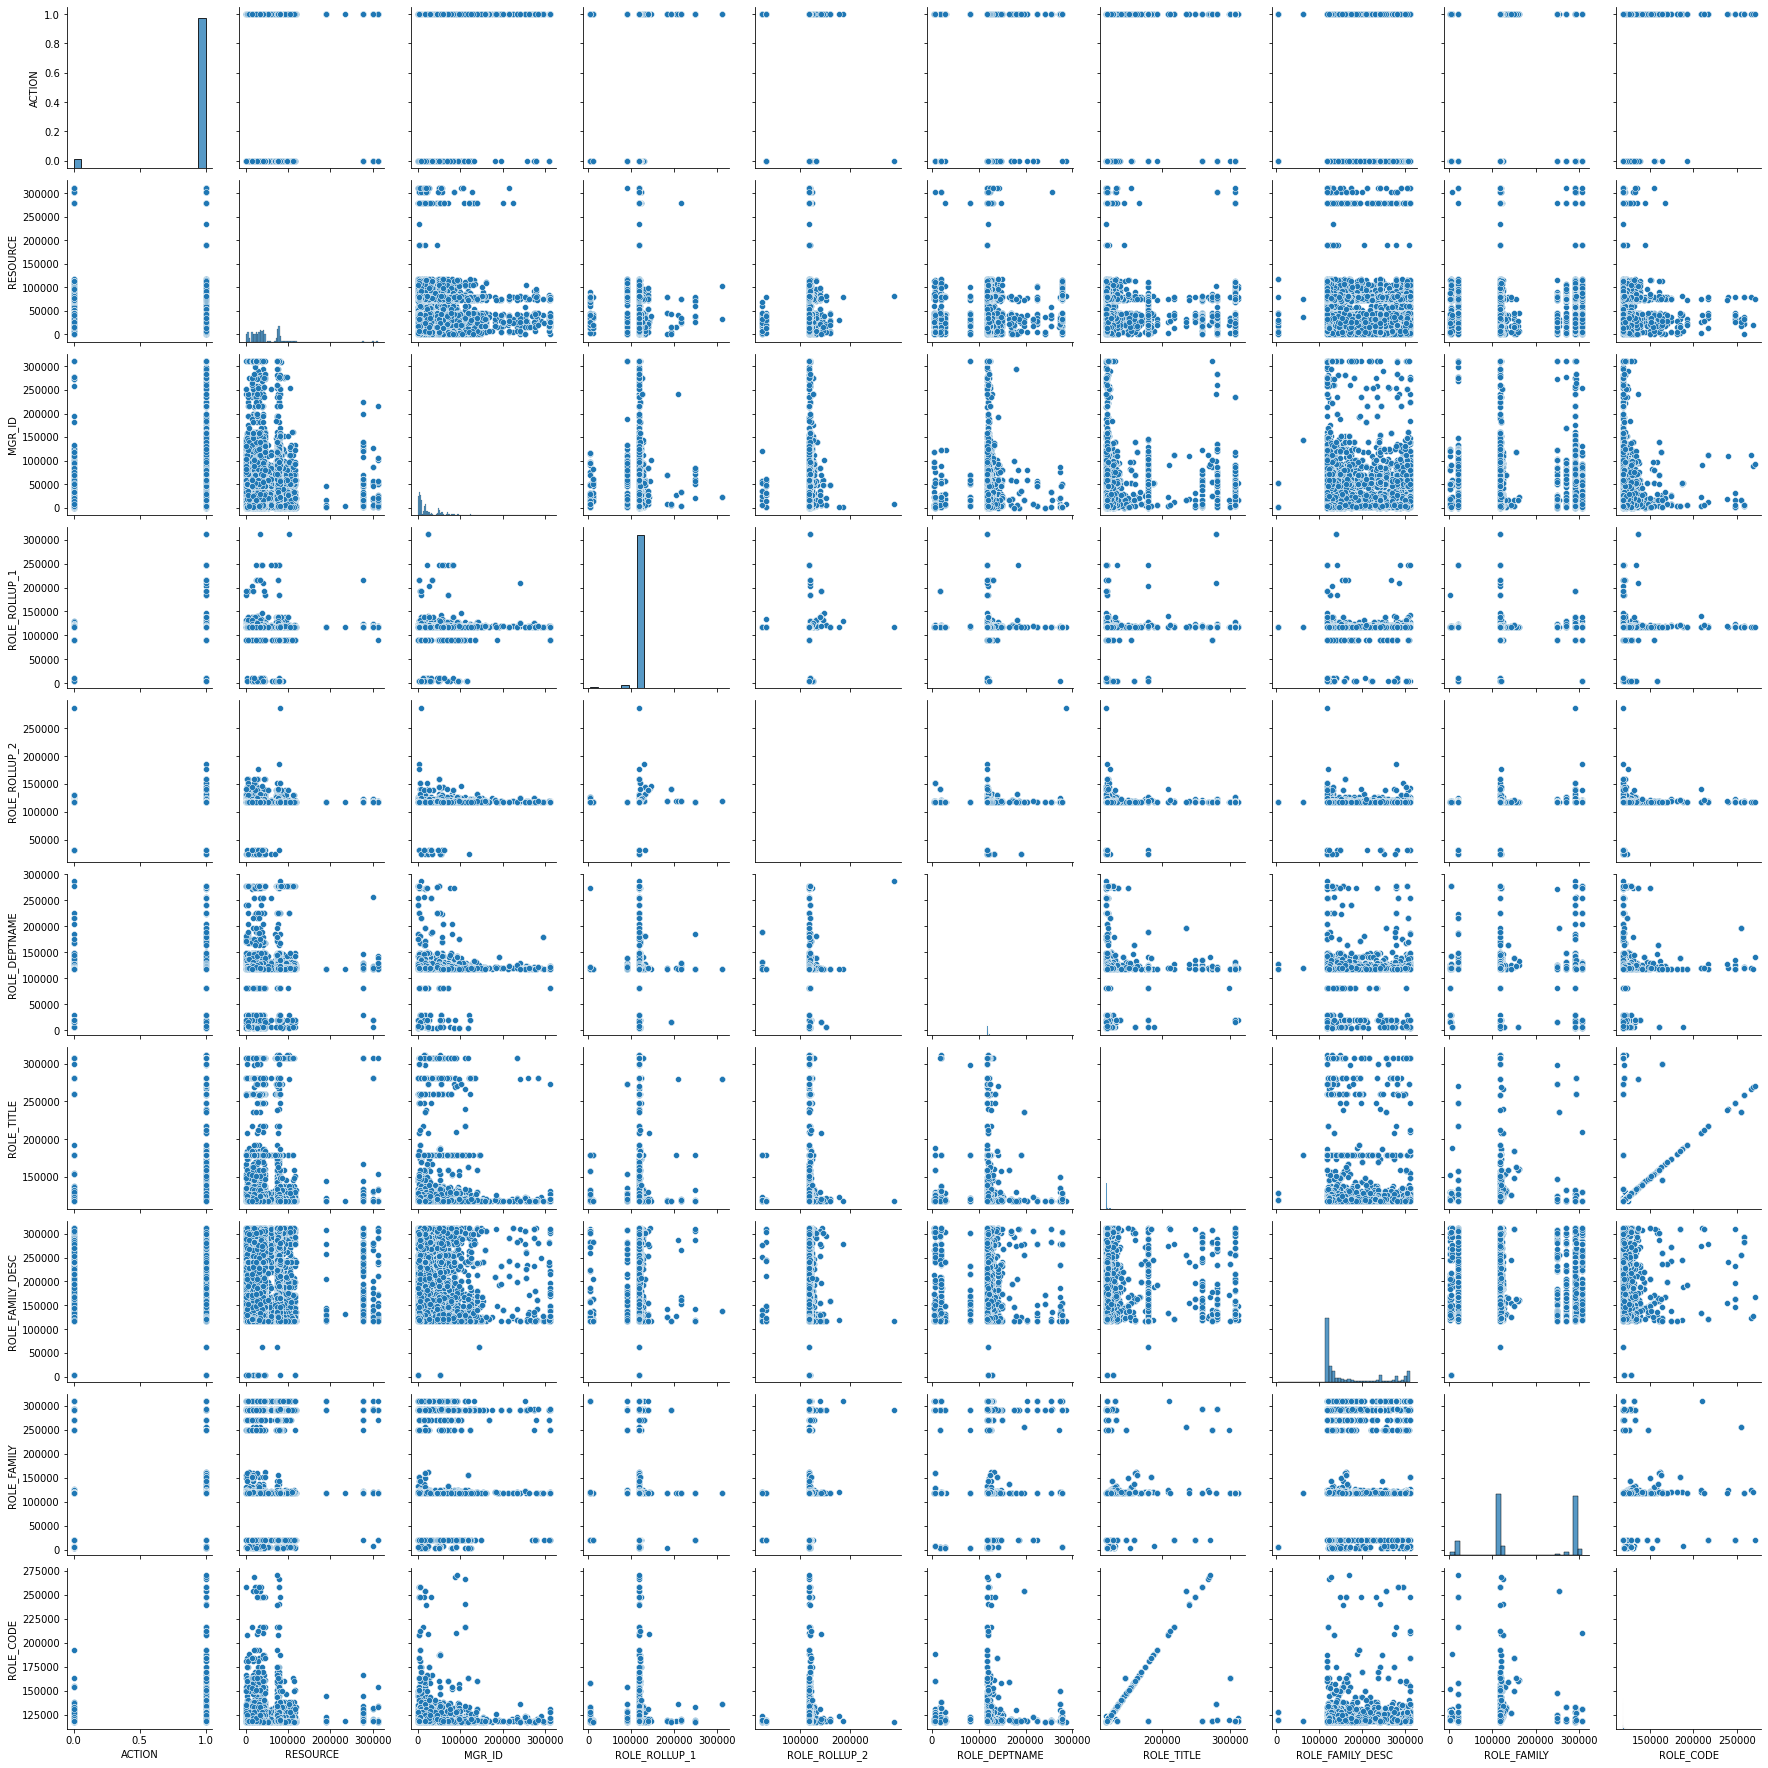

In [ ]:
sns.pairplot(data=train, kind='scatter')

The ranges of the values differ a lot, hence a problem in looking into them all at a time.

                  RESOURCE    MGR_ID  ...  ROLE_CODE    ACTION
RESOURCE          1.000000  0.011088  ...   0.007733  0.000185
MGR_ID            0.011088  1.000000  ...  -0.004067 -0.005167
ROLE_ROLLUP_1    -0.005016 -0.007132  ...  -0.024927 -0.013702
ROLE_ROLLUP_2     0.013438 -0.000364  ...   0.015117  0.005179
ROLE_DEPTNAME     0.030004 -0.009551  ...   0.010319  0.001025
ROLE_TITLE        0.002936  0.017864  ...   0.155920 -0.010169
ROLE_FAMILY_DESC  0.021029 -0.018488  ...   0.092980  0.003565
ROLE_FAMILY       0.031060 -0.118254  ...  -0.148625  0.000502
ROLE_CODE         0.007733 -0.004067  ...   1.000000  0.017147
ACTION            0.000185 -0.005167  ...   0.017147  1.000000

[10 rows x 10 columns]


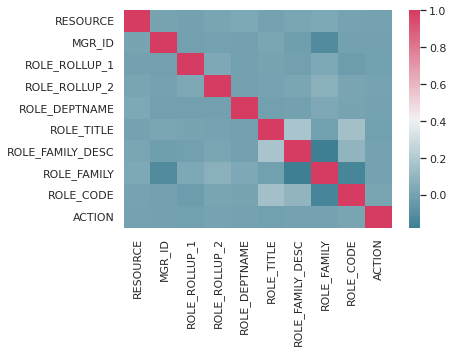

In [ ]:
cmap = sns.diverging_palette(220, 3, sep=1, n=256, as_cmap=True)

correlations = train[['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',\
                      'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE', 'ACTION']].corr()
print(correlations)
sns.heatmap(correlations, cmap=cmap)

The **heatmap** shows the relationship between each feature to all other features. Here, we can see that the correlationn between ROLE_FAMILY and MGR_ID is very low and the highest correlation is between ROLE_CODE and ROLE_TITLE as they have a 1:1 relationship because the unique values for each are the same.

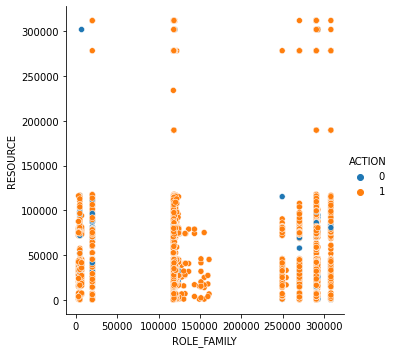

In [ ]:
sns.relplot(data=train, x="ROLE_FAMILY", y="RESOURCE", hue="ACTION")

This plot shows the **relationship** between the RESOURCE and the ROLE_FAMILY column with hue as ACTION.

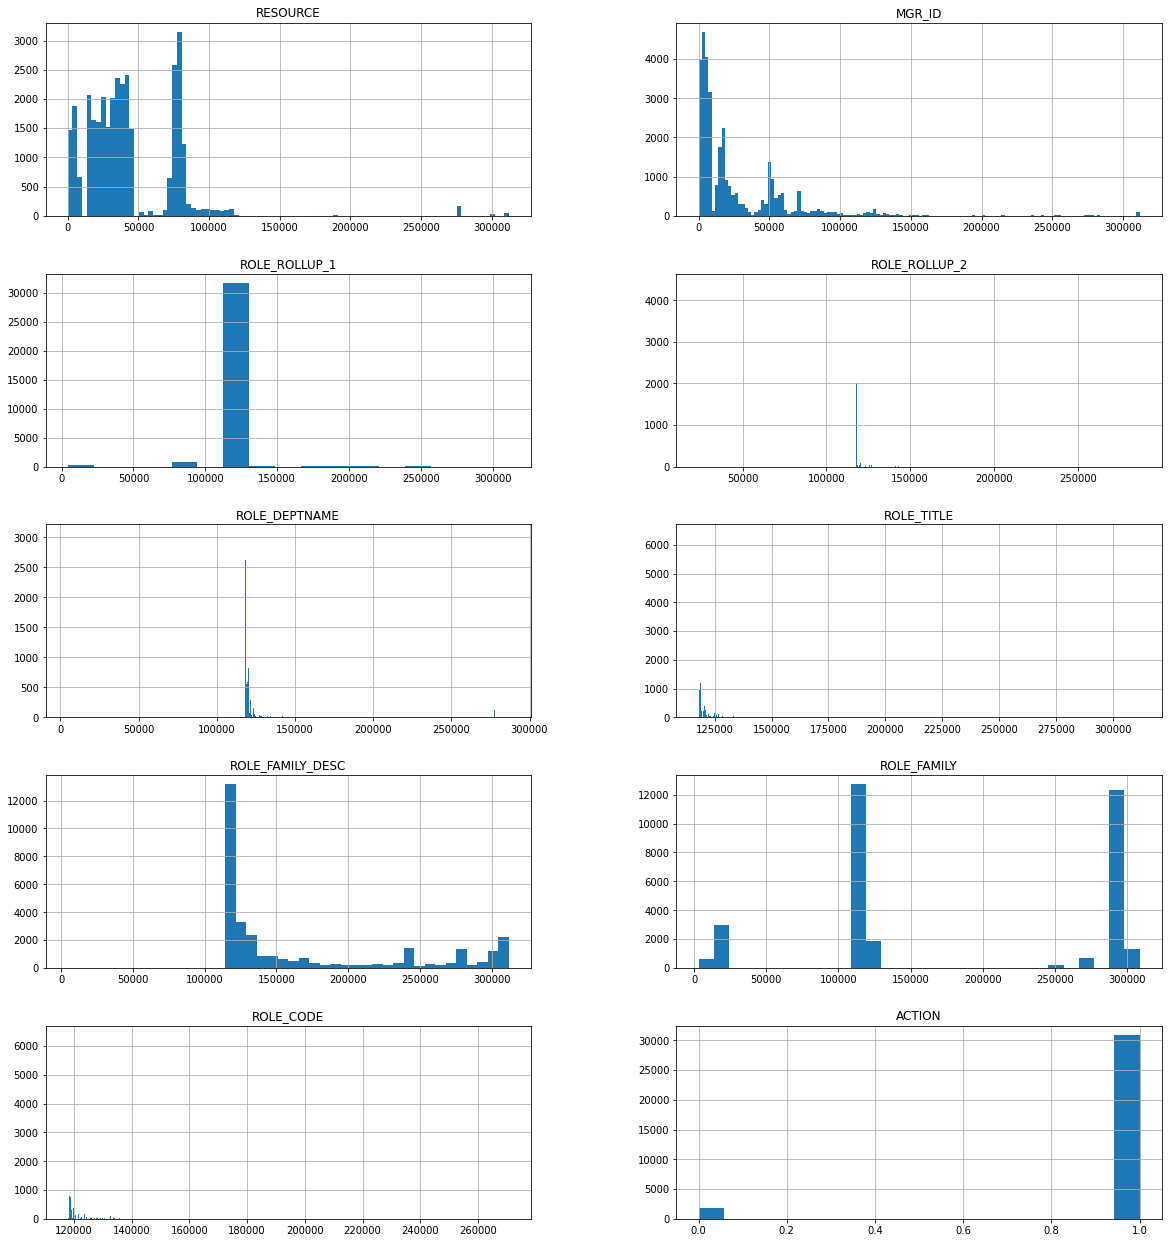

In [ ]:
# Distribution of values of variables - train
dist = train.astype(int).hist(bins='auto', figsize=(20, 22), layout=(5, 2))

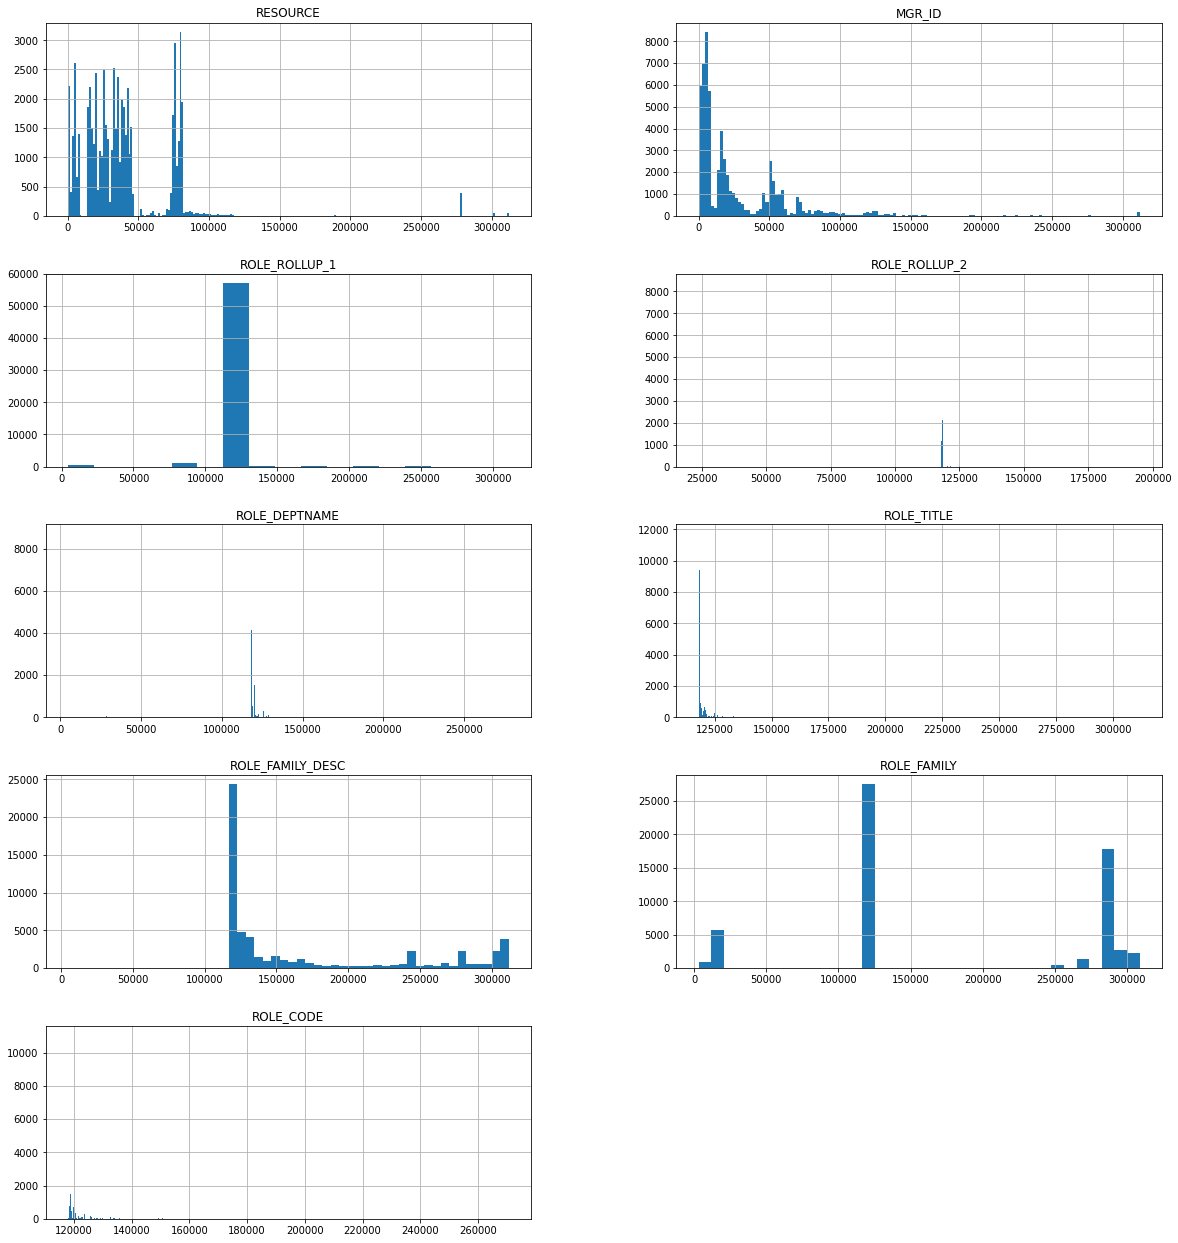

In [ ]:
# Distribution of values of variables - test
test_no_id = test.drop(columns='id')
dist_test = test_no_id.astype(int).hist(bins='auto', figsize=(20, 22), layout=(5, 2))

We are here comparing the ranges and distributions of the features in both train and test dataset.
<br>
According to the graphs, we can notice that the train and test datasets are a little similar with some features.
<br> But the ranges of the features of train and test are not similar.

In [ ]:
train['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

In [ ]:
from sklearn import preprocessing

names = train.columns

normalized = preprocessing.normalize(train)
scaled_df = pd.DataFrame(normalized, columns=names)
scaled_df.head()

ACTION  RESOURCE    MGR_ID  ...  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE
0  0.000002  0.093184  0.202397  ...          0.279190     0.688869   0.279195
1  0.000002  0.040417  0.003622  ...          0.278813     0.725809   0.278820
2  0.000003  0.096984  0.038179  ...          0.707630     0.052081   0.311307
3  0.000002  0.078047  0.011655  ...          0.520493     0.628348   0.255561
4  0.000003  0.143715  0.019884  ...          0.417312     0.066648   0.401799

[5 rows x 10 columns]

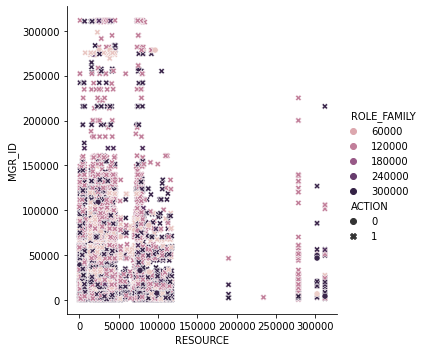

In [ ]:
import seaborn as sns
sns.relplot(data=train,
            x="RESOURCE", 
            y="MGR_ID",
            hue="ROLE_FAMILY",
            #size="ROLE_FAMILY",
            style="ACTION",
            kind="scatter")

From the EDA we can get a few hints about what to do:

* the target classes are unbalanced, we should consider re-balancing the data
* all the categorical features have a different number of values ranging from 70 to up to over 7000 (high cardinality features)<br>
* there are no missing values but many categorical values appear just in test, not in train (this especially affects the RESOURCE feature)
* the categorical values are sparse

# 6. Feature Engineering

Converting the **integer columns** to **categorical values** for better prediction as classification needs to be carried out.

Dropping **id** column from the test dataset

In [117]:
#dropping id column from the test dataset
feature_test = test.drop(columns='id')
feature_test.head()

RESOURCE  MGR_ID  ROLE_ROLLUP_1  ...  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE
0     78766   72734         118079  ...            118177        19721     117880
1     40644    4378         117961  ...            122008       118398     118865
2     75443    2395         117961  ...            301534       249618     118175
3     43219   19986         117961  ...            136187       118960     120774
4     42093   50015         117961  ...            300136       118424     118425

[5 rows x 9 columns]

Dropping the target column **ACTION** from the train dataset for prediction in the further steps.

In [118]:
#dropping the target column 'ACTION' from the train dataset for prediction in the further steps
feature_train = train.drop(columns='ACTION')
feature_train.head()

RESOURCE  MGR_ID  ROLE_ROLLUP_1  ...  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE
0     39353   85475         117961  ...            117906       290919     117908
1     17183    1540         117961  ...            118536       308574     118539
2     36724   14457         118219  ...            267952        19721     117880
3     36135    5396         117961  ...            240983       290919     118322
4     42680    5905         117929  ...            123932        19793     119325

[5 rows x 9 columns]

Converting the interger columns into categorical columns in both train and test.

In [119]:
integer_cols = feature_train.select_dtypes(include=['int']).columns
feature_train[integer_cols] = feature_train[integer_cols].astype('category', copy=False)
feature_test[integer_cols] = feature_test[integer_cols].astype('category', copy=False)

In [120]:
print("Count of Unique values in train and test")
(pd.concat([feature_train.apply(lambda x: len(x.unique())), 
            feature_test.apply(lambda x: len(x.unique()))
           ], axis="columns")
 .rename(columns={0: "train", 1:"test"}))

Count of Unique values in train and test


train  test
RESOURCE           7518  4971
MGR_ID             4243  4689
ROLE_ROLLUP_1       128   126
ROLE_ROLLUP_2       177   177
ROLE_DEPTNAME       449   466
ROLE_TITLE          343   351
ROLE_FAMILY_DESC   2358  2749
ROLE_FAMILY          67    68
ROLE_CODE           343   351

From the above, we can see that there are some values in test that are not present in the train dataset.
We need to feature engineer on this, so that the modelling on train can correctly predict the values that are only present in test dataset.

In [121]:
cat_columns = feature_train.select_dtypes(include=['category']).columns
print("Values in test but not in train")
for col in cat_columns:
    mismatched_codes = len(np.setdiff1d(feature_train[col].unique(), feature_test[col].unique()))
    print(f"{col:20} {mismatched_codes:5}")

Values in test but not in train
RESOURCE              2547
MGR_ID                 224
ROLE_ROLLUP_1            4
ROLE_ROLLUP_2            6
ROLE_DEPTNAME           10
ROLE_TITLE              10
ROLE_FAMILY_DESC       202
ROLE_FAMILY              0
ROLE_CODE               10


There are so many values that are present in test and not in train. Hence, we set the difference and copied all the unique values from the test dataset to train in order to keep up the test accuracy.

In [122]:
print("Missing cases")
(pd.concat([feature_train.isna().sum(), 
           feature_test.isna().sum()
           ], axis="columns")
 .rename(columns={0: "train", 1:"test"}))

Missing cases


train  test
RESOURCE              0     0
MGR_ID                0     0
ROLE_ROLLUP_1         0     0
ROLE_ROLLUP_2         0     0
ROLE_DEPTNAME         0     0
ROLE_TITLE            0     0
ROLE_FAMILY_DESC      0     0
ROLE_FAMILY           0     0
ROLE_CODE             0     0

Now, we substitute **-1** in the missing cases. This is what we substitute when working with categorical columns.

In [123]:
for col in cat_columns:
    unique_values = sorted(feature_train[col].unique())
    print(col, ":", unique_values[:5],'...', unique_values[-5:])
    conversion_dict = dict(zip(unique_values, range(len(unique_values))))
    
    # When working with the Categorical’s codes, missing values will always have a code of -1.
    feature_train[col] = feature_train[col].map(conversion_dict, na_action=-1).astype('category', copy=False)
    feature_test[col] = feature_test[col].map(conversion_dict, na_action=-1).astype('category', copy=False)

RESOURCE : [0, 38, 136, 138, 153] ... [312136, 312139, 312140, 312152, 312153]
MGR_ID : [25, 27, 30, 32, 33] ... [311597, 311651, 311682, 311683, 311696]
ROLE_ROLLUP_1 : [4292, 5110, 11146, 91261, 117876] ... [203209, 209434, 216705, 247952, 311178]
ROLE_ROLLUP_2 : [23779, 31010, 32137, 117877, 117883] ... [151110, 159716, 176316, 185842, 286791]
ROLE_DEPTNAME : [4674, 5488, 5606, 6104, 6725] ... [272283, 274241, 275600, 277693, 286792]
ROLE_TITLE : [117879, 117885, 117896, 117899, 117905] ... [297560, 299559, 307024, 310825, 311867]
ROLE_FAMILY_DESC : [4673, 62587, 117879, 117886, 117897] ... [311782, 311792, 311834, 311839, 311867]
ROLE_FAMILY : [3130, 4673, 6725, 19721, 19793] ... [254395, 270488, 290919, 292795, 308574]
ROLE_CODE : [117880, 117888, 117898, 117900, 117908] ... [254396, 258436, 266863, 268610, 270691]


In [124]:
print("Missing cases")
pd.concat([feature_train.isna().sum(), feature_test.isna().sum()], axis="columns").rename(columns={0: "train", 1:"test"})

Missing cases


train  test
RESOURCE              0     0
MGR_ID                0  1627
ROLE_ROLLUP_1         0     4
ROLE_ROLLUP_2         0    12
ROLE_DEPTNAME         0    62
ROLE_TITLE            0    30
ROLE_FAMILY_DESC      0  1249
ROLE_FAMILY           0     1
ROLE_CODE             0    30

In [125]:
feature_test = feature_test.apply(lambda x: x.fillna(x.value_counts().index[0]))
feature_test.head()

RESOURCE  MGR_ID ROLE_ROLLUP_1  ... ROLE_FAMILY_DESC ROLE_FAMILY ROLE_CODE
0     5481  3708.0          33.0  ...             32.0         3.0       0.0
1     3283   611.0          21.0  ...            232.0        13.0      59.0
2     4992   284.0          21.0  ...           2250.0        61.0      13.0
3     3746  2078.0          21.0  ...            808.0        28.0     132.0
4     3507  2898.0          21.0  ...           2238.0        14.0      28.0

[5 rows x 9 columns]

In [126]:
#cat_columns = Xtest.select_dtypes(include=['category']).columns
#Xtrain[cat_columns] = Xtrain[cat_columns].astype('float', copy=False)
#Xtest[cat_columns] = Xtest[cat_columns].astype('float', copy=False)

In [127]:
feature_train.to_csv("/content/drive/MyDrive/amazon-employee-access-challenge/train-processed.csv", index=False)
feature_test.to_csv("/content/drive/MyDrive/amazon-employee-access-challenge/test-processed.csv", index=False)

**Another way of feature engineering is

# 7. Train and validation split

In [128]:
from sklearn.model_selection import train_test_split

## Computing accuracy
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

#Classisfiers
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [129]:
X_train, X_valid, y_train, y_valid = train_test_split(feature_train, train_action, test_size=0.3, random_state=42)

# 8. Training Models

### 8.1 Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

logistic_model = LogisticRegression()
stats = cross_validate(logistic_model, X_train, y_train, groups=None, scoring='roc_auc', 
                       cv=5, n_jobs=2, return_train_score = True)

stats = pd.DataFrame(stats)
stats.describe().transpose()

count      mean       std  ...       50%       75%       max
fit_time       5.0  0.356833  0.074650  ...  0.376946  0.388036  0.418493
score_time     5.0  0.009200  0.002007  ...  0.010268  0.010282  0.010306
test_score     5.0  0.526865  0.020489  ...  0.529402  0.531014  0.557100
train_score    5.0  0.529465  0.005855  ...  0.528344  0.531592  0.537941

[4 rows x 8 columns]

In [141]:
logistic_model.fit(X_train, y_train)

predictions_log = logistic_model.predict_proba(feature_test)[:,1]

submit_dt = pd.DataFrame()
submit_dt["Id"] = test["id"]
submit_dt["ACTION"] = predictions_log

submit_dt.to_csv("log_submission.csv", index = False)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.503


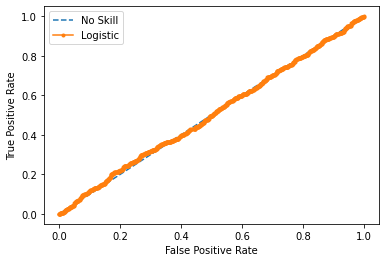

In [142]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_valid))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# predict probabilities
lr_probs = model.predict_proba(X_valid)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_valid, ns_probs)
lr_auc = roc_auc_score(y_valid, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_valid, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()


Logistic regression is predicting values with 50% accuracy. Not expected this, but the scores are very low. Let us try other models with same data.

**Submission and Description**<br>
Logistic regression

 Private Score | Public Score  |  
-------------- | --------------
  0.51372      |   0.53285

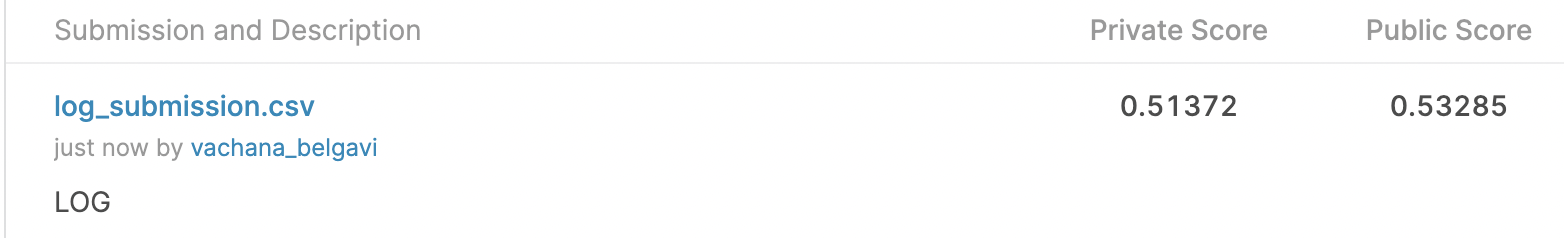

### 8.2 Decision Tree Classifier

In [143]:
DTclf = DecisionTreeClassifier()

stats = cross_validate(DTclf, X_train, y_train, groups=None, scoring='roc_auc', 
                       cv=5, n_jobs=2, return_train_score = True)
stats = pd.DataFrame(stats)
stats.describe().transpose()

count      mean       std  ...       50%       75%       max
fit_time       5.0  0.174433  0.025846  ...  0.177690  0.189520  0.200759
score_time     5.0  0.009173  0.001558  ...  0.009844  0.009957  0.010210
test_score     5.0  0.683676  0.012177  ...  0.688015  0.688830  0.692561
train_score    5.0  1.000000  0.000000  ...  1.000000  1.000000  1.000000

[4 rows x 8 columns]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.680


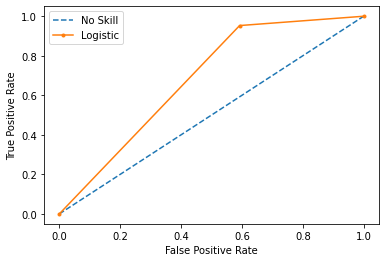

In [144]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_valid))]

# fit a model
dtclf_model = DecisionTreeClassifier()
dtclf_model.fit(X_train, y_train)

# predict probabilities
lr_probs = dtclf_model.predict_proba(X_valid)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_valid, ns_probs)
lr_auc = roc_auc_score(y_valid, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_valid, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

**Submission and Description**<br>
Decision Tree Classifier

 Private Score | Public Score  |  
-------------- | --------------
   0.50081     |   0.50027

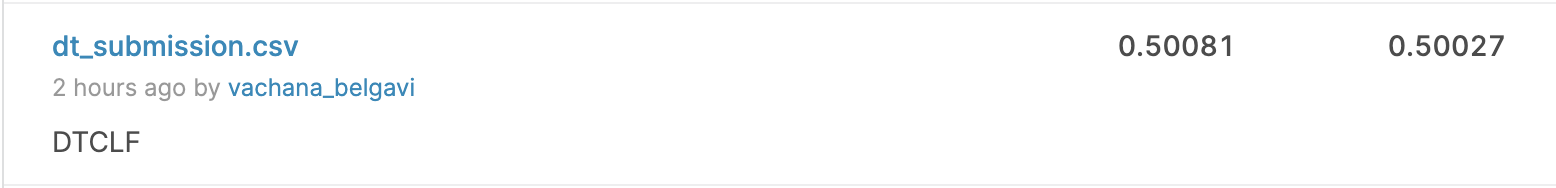

In [145]:
predictions_dt = dtclf_model.predict_proba(feature_test)[:,1]

submit_dt = pd.DataFrame()
submit_dt["Id"] = test["id"]
submit_dt["ACTION"] = predictions_dt

submit_dt.to_csv("dt_submission.csv", index = False)

The predictions of the decision tree classifier are only 50% accurate.

### 8.3 Random Forest Classifier

In [146]:
RandomModel = RandomForestClassifier()

random_stats = cross_validate(RandomModel, X_train, y_train, groups=None, scoring='roc_auc', 
                       cv=5, n_jobs=2, return_train_score = True)
random_stats = pd.DataFrame(stats)
random_stats.describe().transpose()

count      mean       std  ...       50%       75%       max
fit_time       5.0  0.174433  0.025846  ...  0.177690  0.189520  0.200759
score_time     5.0  0.009173  0.001558  ...  0.009844  0.009957  0.010210
test_score     5.0  0.683676  0.012177  ...  0.688015  0.688830  0.692561
train_score    5.0  1.000000  0.000000  ...  1.000000  1.000000  1.000000

[4 rows x 8 columns]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.844


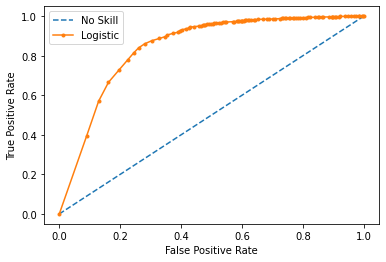

In [147]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_valid))]

# fit a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predict probabilities
lr_probs = model.predict_proba(X_valid)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_valid, ns_probs)
lr_auc = roc_auc_score(y_valid, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_valid, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [148]:
predictions_random = model.predict_proba(feature_test)[:,1]

submit_random = pd.DataFrame()
submit_random["Id"] = test["id"]
submit_random["ACTION"] = predictions_random

submit_random.to_csv("random_submission.csv", index = False)

It is the same with Random Forest Model as the Decision Tree.<br>
Let's consider Hyper parameter tuning. Let's see if that helps.

**Submission and Description**<br>
Random Forest Classifier

 Private Score | Public Score  |  
-------------- | --------------
  0.46840      |   0.47174

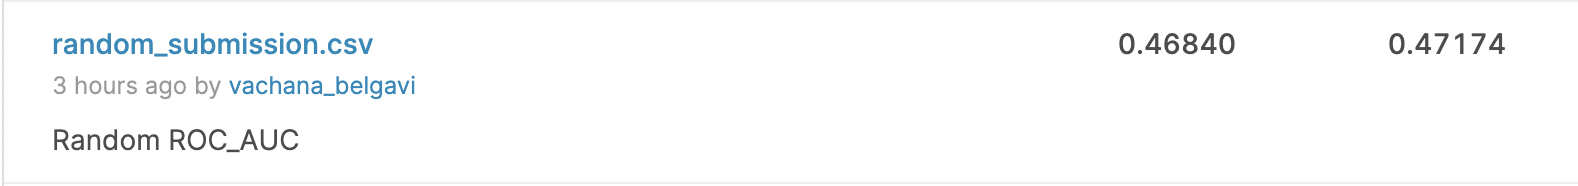

### 8.4 XGBOOST

In [149]:
train_df=feature_train
test_df=feature_test

In [150]:
cat_columns = train_df.select_dtypes(include=['category']).columns
train_df[cat_columns] = train_df[cat_columns].astype('float', copy=False)
test_df[cat_columns] = test_df[cat_columns].astype('float', copy=False)

In [151]:
#train and validation split
F_train, F_valid, f_train, f_valid = train_test_split(train_df, train_action, test_size=0.3, random_state=42)

In [152]:
import xgboost

xg = XGBClassifier()

xg.fit(F_train, f_train)

xg_predict = xg.predict_proba(F_valid)[:,1]

xg_stats = cross_validate(xg, X_train, y_train, groups=None, scoring='roc_auc', 
                       cv=5, n_jobs=2, return_train_score = True)

xg_stats = pd.DataFrame(stats)
xg_stats.describe().transpose()

count      mean       std  ...       50%       75%       max
fit_time       5.0  0.174433  0.025846  ...  0.177690  0.189520  0.200759
score_time     5.0  0.009173  0.001558  ...  0.009844  0.009957  0.010210
test_score     5.0  0.683676  0.012177  ...  0.688015  0.688830  0.692561
train_score    5.0  1.000000  0.000000  ...  1.000000  1.000000  1.000000

[4 rows x 8 columns]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.743


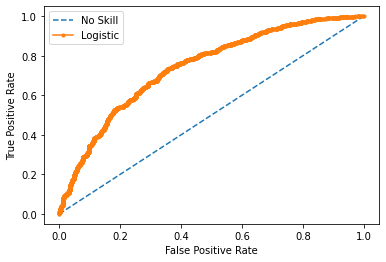

In [153]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(f_valid))]

# fit a model
xgb_model = XGBClassifier()
xgb_model.fit(F_train, f_train)

# predict probabilities
lr_probs = xgb_model.predict_proba(F_valid)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(f_valid, ns_probs)
lr_auc = roc_auc_score(f_valid, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(f_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(f_valid, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

**Submission and Description**<br>
XGBOOST

 Private Score | Public Score  |  
-------------- | --------------
  0.73699     |   0.74154

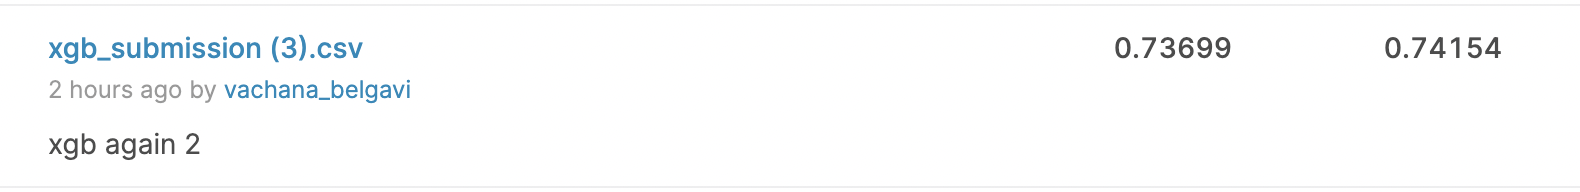

In [154]:
predictions_xgb = xgb_model.predict_proba(feature_test)[:,1]

submit_xgb = pd.DataFrame()
submit_xgb["Id"] = test["id"]
submit_xgb["ACTION"] = predictions_xgb

submit_xgb.to_csv("xgb_submission.csv", index = False)

### 8.5 LightGBM Classifier

In [163]:
import lightgbm as lgb

d_train = lgb.Dataset(F_train, label=f_train)

lgb_params1 = {
}

lightgbm_model = lgb.train(lgb_params1, d_train, 50)

y_pred_lgbmm = lightgbm_model.predict(feature_test)
y_pred_lgbmm

array([0.88114702, 0.95938101, 0.97766737, ..., 0.92754719, 0.93989847,
       0.97916552])

In [164]:
submit_lgbm2 = pd.DataFrame()
submit_lgbm2["Id"] = test["id"]
submit_lgbm2["ACTION"] = y_pred_lgbmm

submit_lgbm2.to_csv("lightgbm2_submission.csv", index = False)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.835


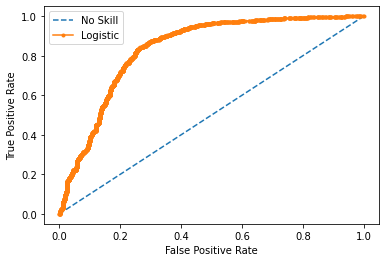

In [159]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_valid))]

# predict probabilities
lr_probs = lightgbm_model1.predict(X_valid)

# calculate scores
ns_auc = roc_auc_score(y_valid, ns_probs)
lr_auc = roc_auc_score(y_valid, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_valid, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

Building the LightGBM model on the train data and checking the test score on Kaggle, it gives only 50% accuracy. We need to use parameter tuning to check if the results improve.

**Submission and Description**<br>
LightGBM Classifier

 Private Score | Public Score  |  
-------------- | --------------
  0.50889      |   0.51106

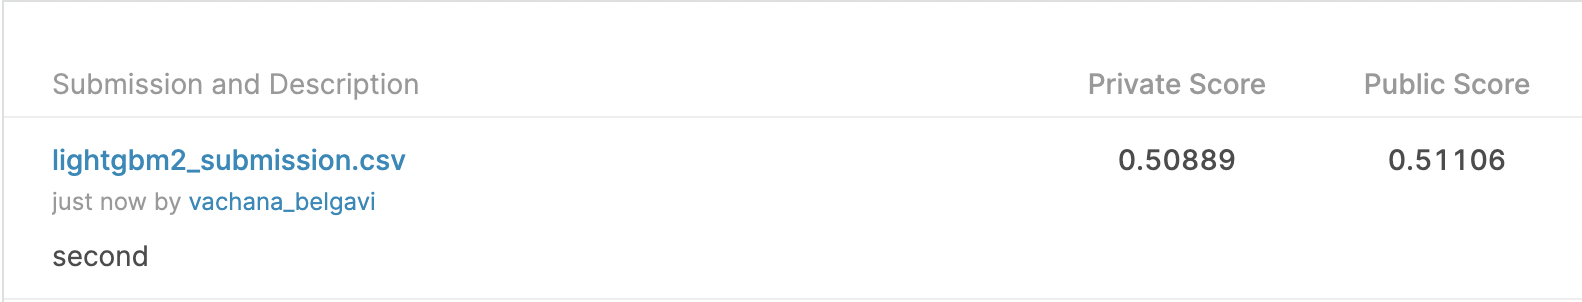

#9. Feature Selection

Seaparting features and target columns to build model on the dataset and then feature select.

In [130]:
X = train.drop(columns='ACTION')
y = train['ACTION']

Using **Random Forest Classifier** for building model on the dataset and then using **Recursive Feature Elimination with Cross Validation**.

In [131]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(verbose=1)

cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = model_selection.cross_val_score(clf, X, y, cv=cv, n_jobs=-1, scoring='accuracy', verbose=1)
clf.fit(X, y)

print(scores)
print('Accuracy: %.3f stdev: %.3f' % (np.mean(np.abs(scores)), np.std(scores)))
print()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.9487336  0.94766555 0.95132743 0.94888618 0.94933618]
Accuracy: 0.949 stdev: 0.001



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.3s finished


In [132]:
from sklearn.feature_selection import RFECV

training_features = np.array(train.drop(['ACTION'], 1).columns)

print("features used during training: ")
print(training_features)
print("")

featselect = RFECV(estimator=clf, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
featselect.fit(X, y)

print("features proposed by RFECV: "),
print(training_features[featselect.support_])

features used during training: 
['RESOURCE' 'MGR_ID' 'ROLE_ROLLUP_1' 'ROLE_ROLLUP_2' 'ROLE_DEPTNAME'
 'ROLE_TITLE' 'ROLE_FAMILY_DESC' 'ROLE_FAMILY' 'ROLE_CODE']

Fitting estimator with 9 features.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 8 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting estimator with 7 features.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


features proposed by RFECV: 
['RESOURCE' 'MGR_ID' 'ROLE_ROLLUP_2' 'ROLE_DEPTNAME' 'ROLE_TITLE'
 'ROLE_FAMILY_DESC']


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.9s finished


In [133]:
features_selected = ['RESOURCE' 'MGR_ID', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_FAMILY_DESC', 'ROLE_CODE']

In [134]:
train.columns

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

In [135]:
train_df = feature_train.drop(columns=['ROLE_ROLLUP_1', 'ROLE_TITLE', 'ROLE_FAMILY'])
train_df.head()

RESOURCE MGR_ID ROLE_ROLLUP_2 ROLE_DEPTNAME ROLE_FAMILY_DESC ROLE_CODE
0     3050   3862            64           307                7         4
1      644    156            68           299               59        38
2     2706   1533            57            14             2083         0
3     2615    867            68           181             1901        23
4     3616    941            13           157              325        77

In [136]:
test_df = feature_test.drop(columns=['ROLE_ROLLUP_1', 'ROLE_TITLE', 'ROLE_FAMILY'])
test_df.head()

RESOURCE  MGR_ID ROLE_ROLLUP_2 ROLE_DEPTNAME ROLE_FAMILY_DESC ROLE_CODE
0     5481  3708.0          38.0          13.0             32.0       0.0
1     3283   611.0          66.0          69.0            232.0      59.0
2     4992   284.0          64.0         153.0           2250.0      13.0
3     3746  2078.0          58.0          52.0            808.0     132.0
4     3507  2898.0          68.0         158.0           2238.0      28.0

Making the train and test splits only with the features selected.

In [137]:
#train and validation split
Xtrain, Xvalid, ytrain, yvalid = train_test_split(train_df, y, test_size=0.3, random_state=79)

# 10. Hyper parameter Tuning

Let's first consider the parameters to tune for different models and then use **RandomSearchCV** to model again and check the accuracy.

### 10.1 RandomizedSearchCV with Random Forest Classifier

In [ ]:
#Number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in a tree
max_depth = [6]
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.arange(6,9)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [True]
criterion = ['entropy']

In [ ]:
param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap,
    'criterion' : criterion
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search_model = RandomizedSearchCV(estimator=RandomModel, param_distributions=param_grid, cv=5, verbose=4, n_jobs=2)
random_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  3.0min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  7.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
from sklearn.externals import joblib
joblib.dump(random_search_model, '/content/drive/MyDrive/amazon-employee-access-challenge/RandomizedSearchCV.pkl')

['/content/drive/MyDrive/amazon-employee-access-challenge/RandomizedSearchCV.pkl']

Checking for the best parameters.

In [ ]:
random_search_model.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 400}

In [ ]:
random_search_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
random_search_model.best_score_

0.9415816542296003

In [ ]:
print('Randomized Search')
print(f'Train accuracy : {random_search_model.score(X_train, y_train):.3f}')
print(f'Test accuracy : {random_search_model.score(X_valid, y_valid):.3f}')

Randomized Search
Train accuracy : 0.942
Test accuracy : 0.943


Got some better results now. Let's check the test score now.

In [ ]:
random_classifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
random_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_opt_random = random_classifier.predict_proba(feature_test)[:, 1]
y_pred_opt_random

array([0.88192968, 0.84384892, 0.84384892, ..., 0.84384892, 0.84384892,
       0.84384892])

In [ ]:
submit_randsearch = pd.DataFrame()
submit_randsearch["Id"] = test["id"]
submit_randsearch["ACTION"] = y_pred_opt_random

submit_randsearch.to_csv("submission.csv", index = False)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.813


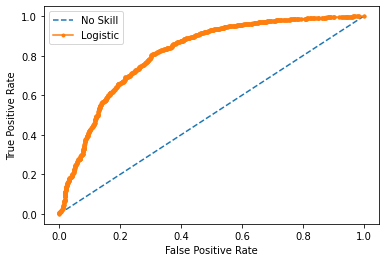

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_valid))]

# fit a model
random_classifier.fit(X_train, y_train)

# predict probabilities
lr_probs = random_classifier.predict_proba(X_valid)[:,1]

# calculate scores
ns_auc = roc_auc_score(y_valid, ns_probs)
lr_auc = roc_auc_score(y_valid, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_valid, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

**Submission and Description**<br>
RandomSearchCV with RandomForestClassifier

 Private Score | Public Score  |  
-------------- | --------------
  0.81720      |   0.82571

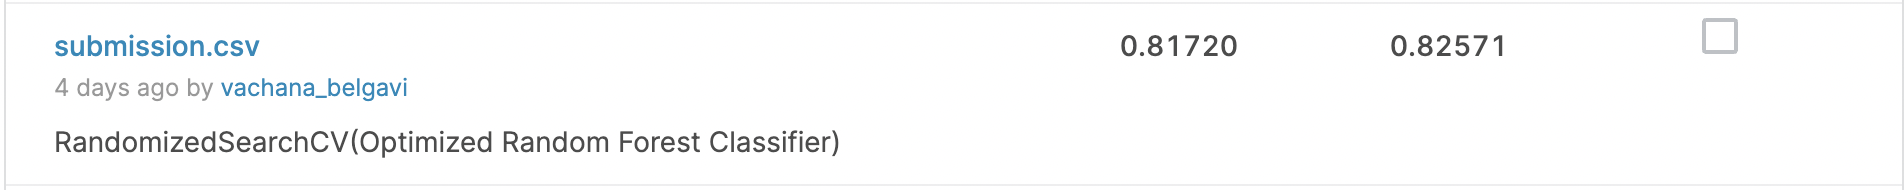

### 10.2 RandomizedSearchCV with XGBoost model

In [ ]:
train_df=feature_train
test_df=feature_test

In [ ]:
cat_columns = train_df.select_dtypes(include=['category']).columns
train_df[cat_columns] = train_df[cat_columns].astype('float', copy=False)
test_df[cat_columns] = test_df[cat_columns].astype('float', copy=False)

In [ ]:
#train and validation split
F_train, F_valid, f_train, f_valid = train_test_split(train_df, train_action, test_size=0.3, random_state=42)

In [ ]:
params = {
          'learning_rates'   : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50],
          'max_depth'        : [3, 4, 5, 6, 7, 8, 9],
          'min_child_weight' : [1, 3, 5, 7, 9],
          'gamma'            : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
          'colsample_bytree' : [0.3, 0.4, 0.5, 0.6, 0.7],
          'reg_lambda'       : [.43, .44, .45, .46,.47, .48],
          'reg_alpha'        : [0],
          'booster'          : ['gbtree']
}

In [ ]:
Xgbmodel = XGBClassifier()

In [ ]:
xgb_search_model = RandomizedSearchCV(Xgbmodel, param_distributions=params, n_iter=10, scoring='roc_auc', n_jobs=5, random_state=42, cv=5, verbose=3)
xgb_search_model.fit(F_train, f_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   29.7s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:   55.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                             

In [ ]:
xgb_search_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.5,
              learning_rate=0.1, learning_rates=0.2, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=0.47, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_search_model.best_score_

0.8236853932219802

In [ ]:
xgb_search_model.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.3,
 'gamma': 0.5,
 'learning_rates': 0.2,
 'max_depth': 8,
 'min_child_weight': 1,
 'reg_alpha': 0,
 'reg_lambda': 0.47}

In [ ]:
print('Randomized Search with XGBoost')
print(f'Train accuracy : {xgb_search_model.score(F_train, f_train):.3f}')
print(f'Test accuracy : {xgb_search_model.score(F_valid, f_valid):.3f}')

Randomized Search with XGBoost
Train accuracy : 0.962
Test accuracy : 0.837


In [ ]:
xgb_opt = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.1, learning_rates=0.45, max_delta_step=0,
              max_depth=8, min_child_weight=5, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=0.44, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)
xgb_opt.fit(F_train, f_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.1, learning_rates=0.45, max_delta_step=0,
              max_depth=8, min_child_weight=5, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=0.44, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_opt, F_train, f_train, cv=10)
print('Cross-Validation Accuracy Scores: ', scores)

Cross-Validation Accuracy Scores:  [0.94725371 0.94594595 0.94507411 0.94856146 0.94463819 0.94376635
 0.94768963 0.94681779 0.94592237 0.94417793]


In [ ]:
y_pred_opt_xgb = xgb_opt.predict_proba(feature_test)[:, 1]
y_pred_opt_xgb

array([0.9499881, 0.9761144, 0.9720929, ..., 0.9468515, 0.9382515,
       0.9909763], dtype=float32)

In [ ]:
submit_xgbsearch = pd.DataFrame()
submit_xgbsearch["Id"] = test["id"]
submit_xgbsearch["ACTION"] = y_pred_opt_xgb

submit_xgbsearch.to_csv("submission.csv", index = False)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.832


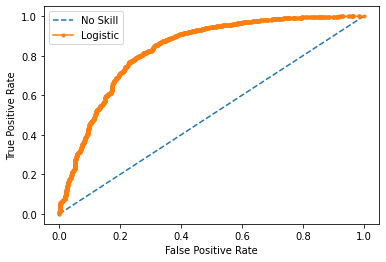

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(f_valid))]

# fit a model
xgb_opt.fit(F_train, f_train)

# predict probabilities
lr_probs = xgb_opt.predict_proba(F_valid)[:,1]

# calculate scores
ns_auc = roc_auc_score(f_valid, ns_probs)
lr_auc = roc_auc_score(f_valid, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(f_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(f_valid, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

XGBoost with hyperparameter tuning worked well only with the train but is overfitting. 
<br>
Let's see the test score.

**Submission and Description**<br>
RandomSearchCV with XGBoost

 Private Score | Public Score  |  
-------------- | --------------
  0.55247      |   0.55567

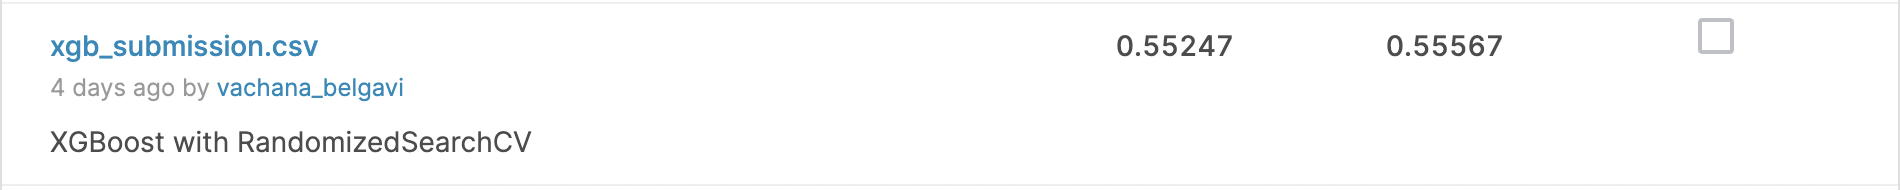

### 10.3 LightGBM hyper parameter tuning

In [ ]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

d_train = lgb.Dataset(X_train, label=y_train)

lgb_params = {
              'learning_rate' : 0.05,
              'boosting_type' : 'gbdt',
              'objective' : 'binary',
              'metric' : ['auc', 'binary_logloss'],
              'num_leaves' : 100,
              'max_depth' : 10
}

lightgbm_model = lgb.train(lgb_params, d_train, 50)

y_pred_lgbm = lightgbm_model.predict(feature_test)
y_pred_lgbm

array([0.96668123, 0.94859127, 0.94859127, ..., 0.94859127, 0.94859127,
       0.94859127])

In [ ]:
submit_lgbm = pd.DataFrame()
submit_lgbm["Id"] = test["id"]
submit_lgbm["ACTION"] = y_pred_lgbm

submit_lgbm.to_csv("lightgbm_submission.csv", index = False)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.836


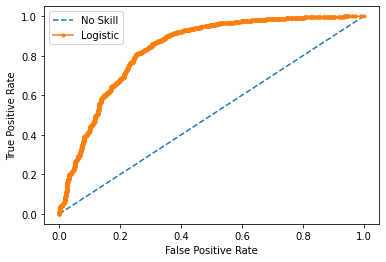

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_valid))]

# fit a model
lightgbm_model = lgb.train(lgb_params, d_train, 100)

# predict probabilities
lr_probs = lightgbm_model.predict(X_valid)

# calculate scores
ns_auc = roc_auc_score(y_valid, ns_probs)
lr_auc = roc_auc_score(y_valid, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_valid, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

**Submission and Description**<br>
LightGBM with hyper parameter tuning

 Private Score | Public Score  |  
-------------- | --------------
  0.53851      |   0.52856

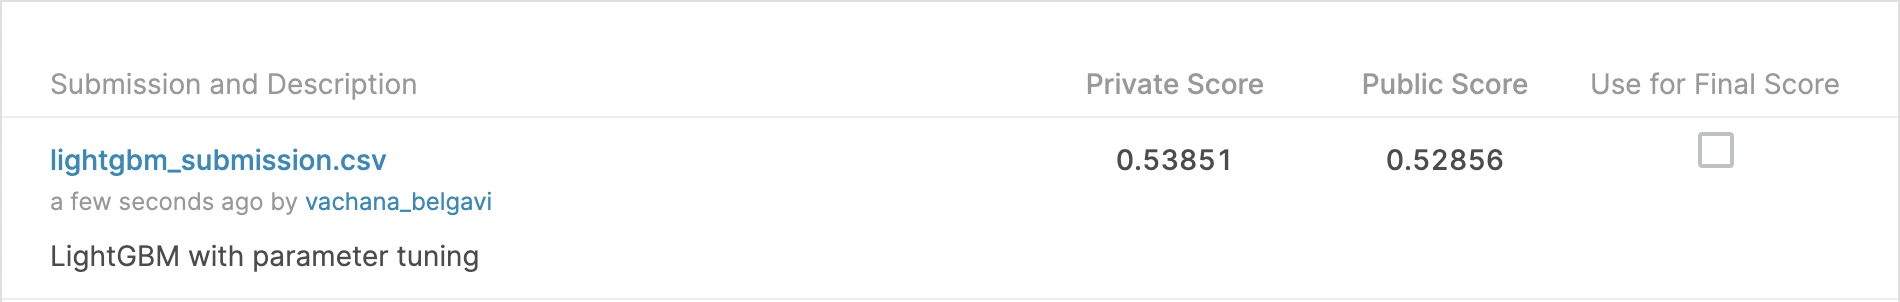

### 10.4 Decison Tree Classifier

In [165]:
#Number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
#Maximum number of levels in a tree
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.arange(1,10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
criterion = ['entropy', 'gini']

In [169]:
from sklearn.model_selection import RandomizedSearchCV

params_list = {
    #'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'criterion' : criterion
}

dt_random_search = RandomizedSearchCV(estimator=DTclf, param_distributions=params_list, cv=5, verbose=5, n_jobs=2)
dt_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  36 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    1.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [170]:
dt_random_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [171]:
dt_random_search.best_score_

0.9415816542296003

In [172]:
dt_random_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 8}

In [176]:
print('Randomized Search with Decision Tree Classifier')
print(f'Train accuracy : {dt_random_search.score(X_train, y_train):.3f}')
print(f'Test accuracy : {dt_random_search.score(X_train, y_train):.3f}')

Randomized Search with Decision Tree Classifier
Train accuracy : 0.942
Test accuracy : 0.942


In [182]:
DTclf_parameters = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DTclf_parameters.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [183]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DTclf_parameters, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores: ', scores)

Cross-Validation Accuracy Scores:  [0.94158675 0.94158675 0.94158675 0.94158675 0.94158675 0.94158675
 0.94158675 0.94158675 0.94156127 0.94156127]


In [184]:
y_pred_opt_dt = DTclf_parameters.predict_proba(feature_test)[:, 1]
y_pred_opt_dt

array([0.8553719 , 0.95199409, 0.95199409, ..., 0.95199409, 0.95199409,
       0.95199409])

In [185]:
submit_xgbsearch = pd.DataFrame()
submit_xgbsearch["Id"] = test["id"]
submit_xgbsearch["ACTION"] = y_pred_opt_dt

submit_xgbsearch.to_csv("dt_params_submission.csv", index = False)

**Submission and Description**<br>
RandomizedSearchCV with Decision Tree

 Private Score | Public Score  |  
-------------- | --------------
  0.60569      |   0.60078

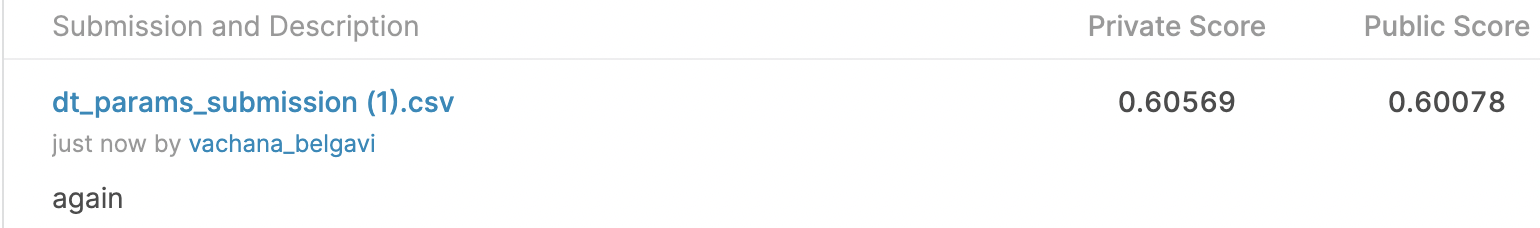

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.566


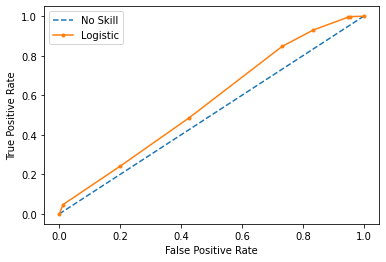

In [186]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_valid))]

# fit a model
DTclf_parameters.fit(X_train, y_train)

# predict probabilities
lr_probs = DTclf_parameters.predict_proba(X_valid)[:,1]

# calculate scores
ns_auc = roc_auc_score(y_valid, ns_probs)
lr_auc = roc_auc_score(y_valid, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_valid, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# 11. Alternate Method

### 11.1 Method 1

First, I'd like to draw your attention to columns RESOURCE,MGR_ID and ROLE_FAMILY_DESC. These 3 columns are high-cardinality categorical features. That means they have a lot of unique values and that makes them harder to encode.

Also, take a look on ROLE_CODE and ROLE_TITLE. These 2 columns have exactly the same amount of unique values. That’s suspicious.

Let's have a closer look.

In [ ]:
import itertools
target = "ACTION"
train_1 = [x for x in train.columns if x!=target]

col1 = 'ROLE_CODE'
col2 = 'ROLE_TITLE'

pair = len(train.groupby([col1,col2]).size())
single = len(train.groupby([col1]).size())

print(col1, col2, pair, single)

ROLE_CODE ROLE_TITLE 343 343


It seems like these 2 columns have 1:1 relationship. For each unique value in column ROLE_CODE there is 1 and only 1 unique value in column ROLE_TITLE. In other words we don't need both columns to build a model, so I'm removing ROLE_TITLE.

In [ ]:
train_1 = [x for x in train_1 if x!='ROLE_TITLE']

Ok, that's it for our very short data analysis, unfortunately deeper analysis is out-of-scope of our today's topic.

At the end let's transform our data using the most straight-forward approach - one-hot encoding using OneHotEncoder transformation from scikit-learn package.

After transformation we will fit LogisticRegression and check it performance using 5-fold cross-validation.

In [ ]:
#linear - OHE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=True, dtype=np.float32, handle_unknown='ignore')

In [ ]:
X = ohe.fit_transform(train[train_1])
y = train["ACTION"].values

For CV I'm going to use cross_validate function, this function is quite useful, you can even pass fit parameters to estimator.

In [ ]:
from sklearn.model_selection import cross_validate

model = LogisticRegression(
                penalty='l2',  
                C=1.0, 
                fit_intercept=True, 
                random_state=432,
                solver = 'liblinear',
                max_iter = 1000,
        )
stats = cross_validate(model, X, y, groups=None, scoring='roc_auc', 
                       cv=5, n_jobs=2, return_train_score = True)
stats = pd.DataFrame(stats)
stats.describe().transpose()

count      mean       std  ...       50%       75%       max
fit_time       5.0  0.223881  0.034107  ...  0.217982  0.234255  0.276346
score_time     5.0  0.005501  0.001344  ...  0.005412  0.006664  0.006687
test_score     5.0  0.863918  0.010000  ...  0.869491  0.871882  0.871910
train_score    5.0  0.974355  0.000790  ...  0.974344  0.974946  0.975144

[4 rows x 8 columns]

Our linear model gets AUC score of 0.8636, which is pretty ok, but not good enough for Kaggle competition. Let's find out how we can transform/engineer our features to get better score.

Let's check LB score for our baseline.

In [ ]:
X = ohe.fit_transform(train[train_1])
y = train["ACTION"].values
X_te = ohe.transform(test[train_1])

model.fit(X,y)
predictions = model.predict_proba(X_te)[:,1]

submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = predictions

submit.to_csv("submission.csv", index = False)

**Submission and Description**<br>
Logistic regression with column transformtation

 Private Score | Public Score  |  
-------------- | --------------
  0.87634      |   0.87977

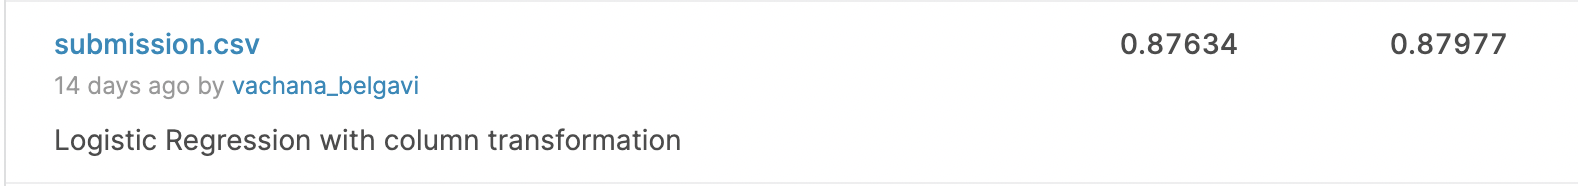

### 11.2 Method 2

In [ ]:
train['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

**IMPORTANT**
<br>
The target column has **30,872** 1s and **1897** 0s. That is an imbalance in the column.

Before balancing the **ACTION** column, let's model with Logistic Regression to see the accuracy score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression().fit(X_train, y_train)

logistic_predict = logistic_model.predict(X_valid)

accuracy_score(y_valid, logistic_predict)

0.9433424880480114

Train accuracy comes to be 94.33%.
Now, let's see what will happen if the **ACTION** column is balanced and then model using Logistic Regression.

In [ ]:
from sklearn.utils import resample
import pandas as pd

zero = train[train.ACTION==0]
one = train[train.ACTION==1]

upsample_zero = resample(zero,
                         replace=True,
                         n_samples=len(one),
                         random_state=42)

upsampled = pd.concat([upsample_zero, one])

upsampled.ACTION.value_counts()

1    30872
0    30872
Name: ACTION, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Y_train = upsampled.ACTION
x_train = upsampled.drop('ACTION', axis=1)

logistic_model = LogisticRegression(solver='liblinear').fit(x_train, Y_train)

logistic_predict = logistic_model.predict_proba(feature_test)[:,1]

log_pred = logistic_model.predict(X_valid)
accuracy_score(y_valid, log_pred)

0.26040077306479503

The trainn accuracy comes down to 26.04%, which was unexpected.

In [ ]:
submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = logistic_predict

submit.to_csv("logistic_submission.csv", index = False)

**Submission and Description**<br>
Logistic regression

 Private Score | Public Score  |  
-------------- | --------------
  0.53851      |   0.52856

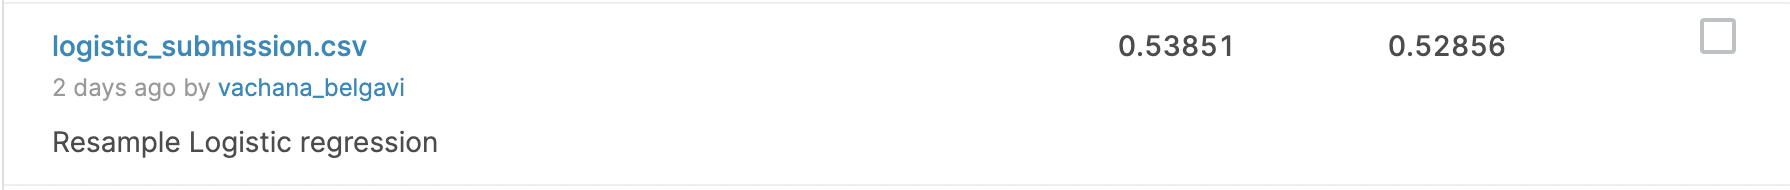

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier()
random_model.fit(X_train, y_train)

random_predict = random_model.predict(X_valid)
accuracy_score(y_valid, random_predict)

0.946292340555386

In [ ]:
random_predict = random_model.predict_proba(feature_test)[:,1]

submit = pd.DataFrame()
submit["Id"] = test["id"]
submit["ACTION"] = random_predict

submit.to_csv("randomres_submission.csv", index = False)

Modelling using the **Random Forest Classifier**, the train accuracy is 94.55% which is almost same as the Logistic Regression.

**Submission and Description**<br>
Random Forest Classifier with resampling

 Private Score | Public Score  |  
-------------- | --------------
  0.83385      |   0.83601

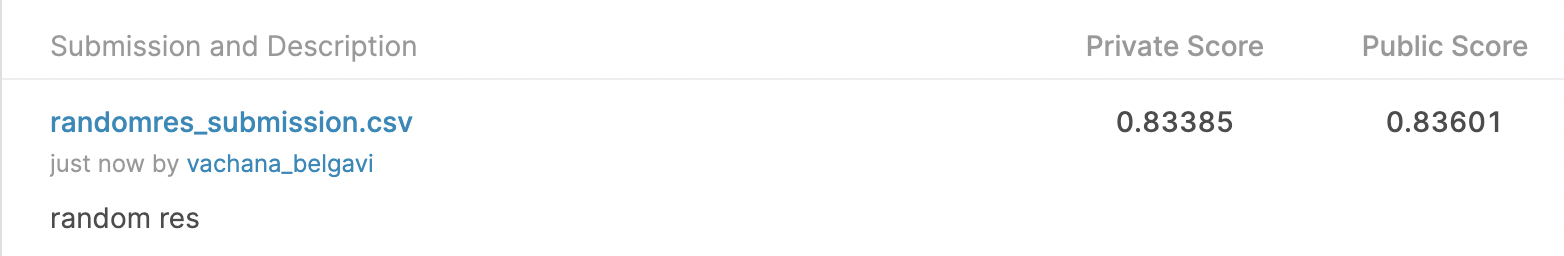

**LightGBM**

Now, let's build the model with LightGBM with some hyper-parameter tuning.

In [ ]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label=y_train)

lgb_params = {
              'learning_rate' : 0.05,
              'boosting_type' : 'gbdt',
              'objective' : 'binary',
              'metric' : ['auc', 'binary_logloss'],
              'num_leaves' : 100,
              'max_depth' : 10
}

lightgbm_model = lgb.train(lgb_params, d_train, 50)

y_pred_lgbm = lightgbm_model.predict(feature_test)

for i in range(0, X_valid.shape[0]):
  if y_pred_lgbm[i] >= 0.5:
    y_pred_lgbm[i]=1
  else:
    y_pred_lgbm[i]=0

In [ ]:
y_pred_train_lgbm = lightgbm_model.predict(X_valid)

for i in range(0, X_valid.shape[0]):
  if y_pred_train_lgbm[i] >= 0.5:
    y_pred_train_lgbm[i]=1
  else:
    y_pred_train_lgbm[i]=0

accuracy_score(y_valid, y_pred_train_lgbm)

0.9470043739192351

In [ ]:
submit_lgbm = pd.DataFrame()
submit_lgbm["Id"] = test["id"]
submit_lgbm["ACTION"] = y_pred_lgbm

submit_lgbm.to_csv("lightgbm_res_submission.csv", index = False)

**Submission and Description**<br>
LightGBM with resampling

 Private Score | Public Score  |  
-------------- | --------------
  0.75792      |   0.75980

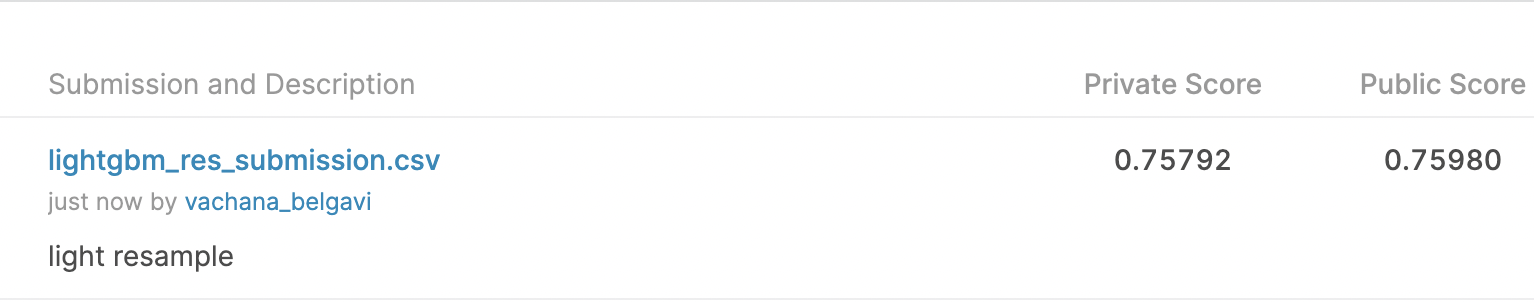

# 12. CatBoost

### 12.1 Catboost Installation

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 76.4 MB 31 kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


### 12.2 Loading Datasets

In [ ]:
from catboost.datasets import amazon

traindf, testdf = amazon()

In [ ]:
traindf.shape

(32769, 10)

In [ ]:
testdf.shape

(58921, 10)

In [ ]:
traindf.head()

ACTION  RESOURCE  MGR_ID  ...  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE
0       1     39353   85475  ...            117906       290919     117908
1       1     17183    1540  ...            118536       308574     118539
2       1     36724   14457  ...            267952        19721     117880
3       1     36135    5396  ...            240983       290919     118322
4       1     42680    5905  ...            123932        19793     119325

[5 rows x 10 columns]

**ACTION** is the target column

In [ ]:
testdf.head()

id  RESOURCE  MGR_ID  ...  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE
0   1     78766   72734  ...            118177        19721     117880
1   2     40644    4378  ...            122008       118398     118865
2   3     75443    2395  ...            301534       249618     118175
3   4     43219   19986  ...            136187       118960     120774
4   5     42093   50015  ...            300136       118424     118425

[5 rows x 10 columns]

**Unique** data points

In [ ]:
traindf.apply(lambda x : len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [ ]:
testdf.apply(lambda x : len(x.unique()))

id                  58921
RESOURCE             4971
MGR_ID               4689
ROLE_ROLLUP_1         126
ROLE_ROLLUP_2         177
ROLE_DEPTNAME         466
ROLE_TITLE            351
ROLE_FAMILY_DESC     2749
ROLE_FAMILY            68
ROLE_CODE             351
dtype: int64

### 12.3. EDA

**EDA** to check the ranges of the features

In [ ]:
#plot libraries
import seaborn as sns
import matplotlib.pyplot as plt

#dataset manipulation library
import pandas as pd

#arrays and math functions library
import numpy as np

**Displot** to show the range of each feature

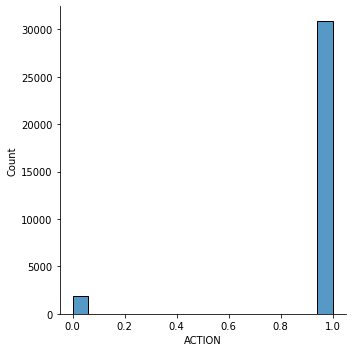

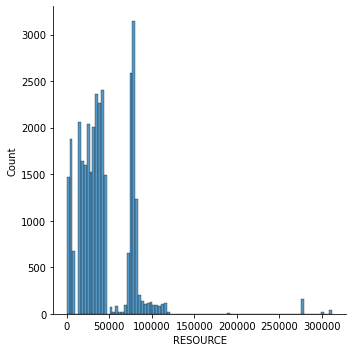

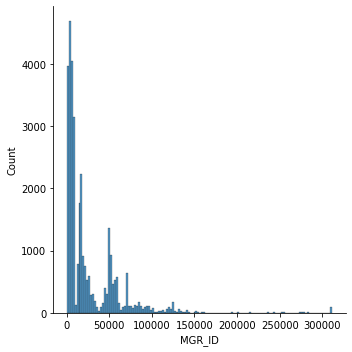

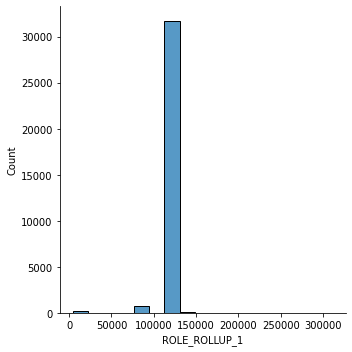

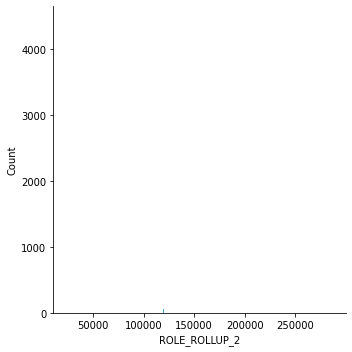

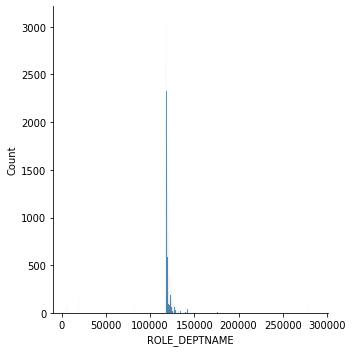

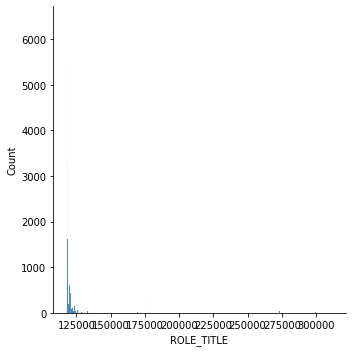

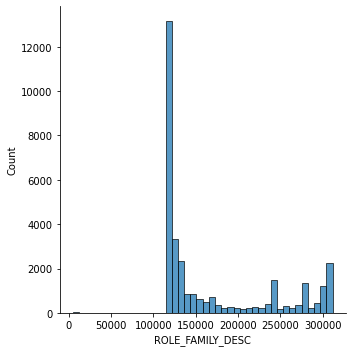

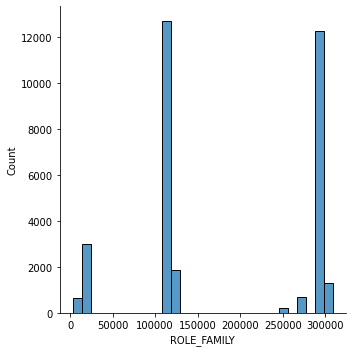

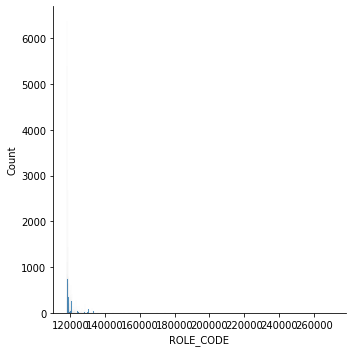

In [ ]:
for i in traindf.describe().columns:
  sns.displot(traindf[i].dropna())
  plt.show()

In [ ]:
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

**Boxplot** to check for outliers

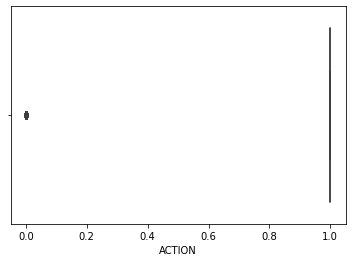

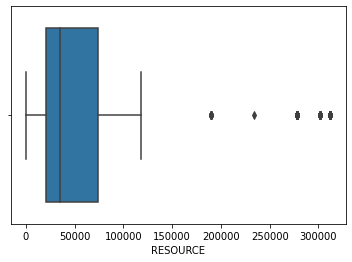

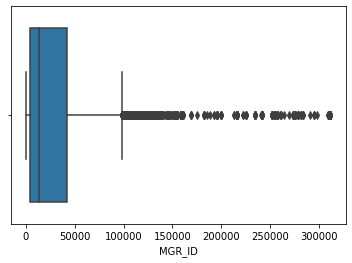

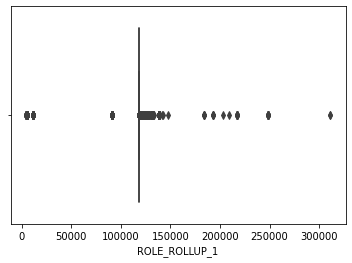

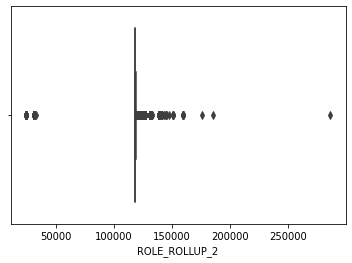

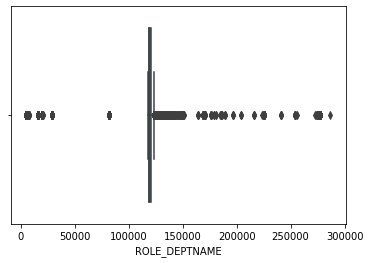

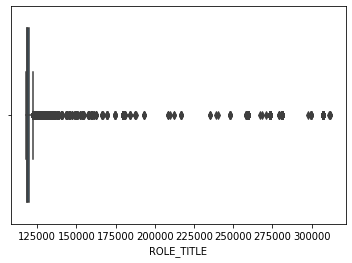

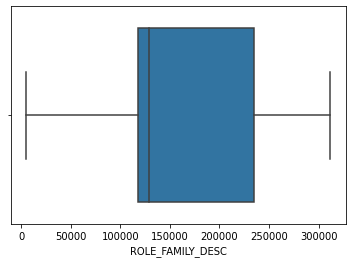

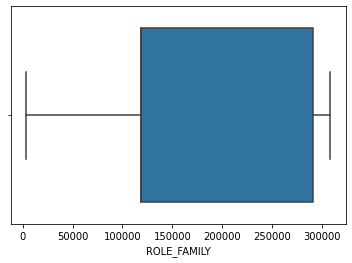

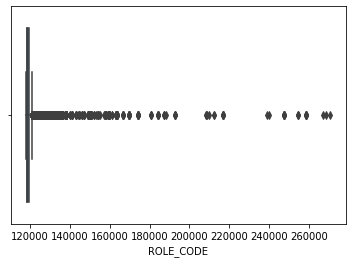

In [ ]:
for i in traindf.describe().columns:
  sns.boxplot(traindf[i].dropna())
  plt.show()

As the ranges of each feature vary, there is not much we can say from the boxplots.

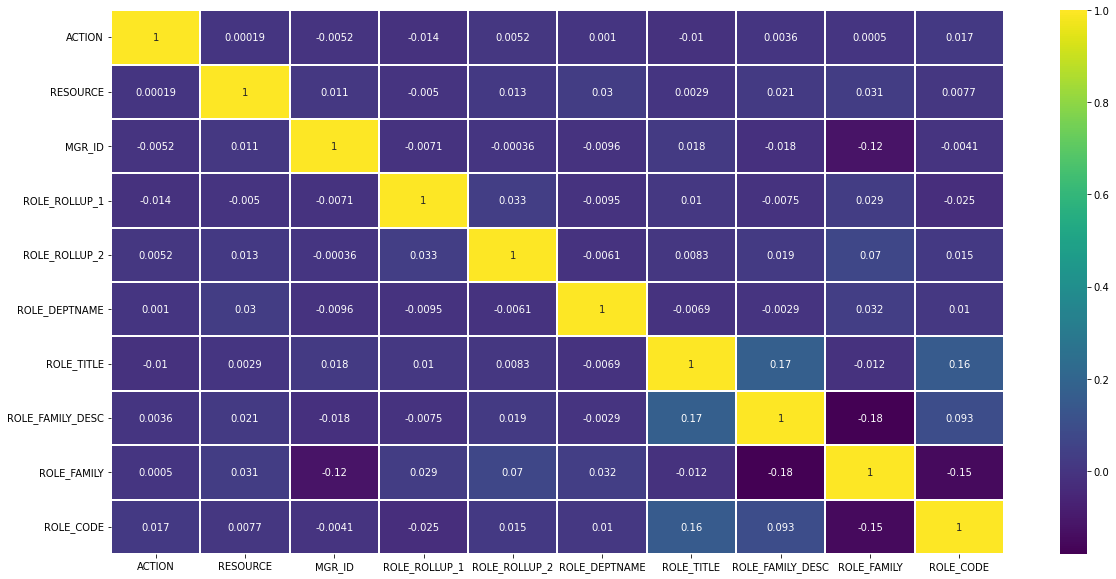

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(traindf.corr(), annot=True, cmap='viridis', linewidths=1)

Heatmap gives us the correlation between each of the features with another. We see that some features are very lightly correlated and the highest correlation is found with ROLE_TITLE and ROLE_FAMILY_DESC, and ROLE_TITLE and ROLE_CODE.

### 12.4 Model Building

Seaparated independent features and the tartget variable for modelling

In [ ]:
y = traindf['ACTION']

X = traindf.drop(columns='ACTION')

X_test = testdf.drop(columns='id')

**Train** and **Validation** split on the data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from catboost import CatBoostClassifier

params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': 1
         }
catboost1 = CatBoostClassifier(**params)
catboost1.fit(X_train, y_train, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_valid, y_valid), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True # True for visualization of the training process (it is not shown in a published kernel - try executing this code)
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.068702
0:	test: 0.5736753	best: 0.5736753 (0)	total: 56.4ms	remaining: 56.3s
200:	test: 0.7911248	best: 0.7911248 (200)	total: 1.9s	remaining: 7.55s
400:	test: 0.8142176	best: 0.8142176 (400)	total: 3.76s	remaining: 5.61s
600:	test: 0.8253019	best: 0.8254558 (598)	total: 5.65s	remaining: 3.75s
800:	test: 0.8292947	best: 0.8295436 (761)	total: 7.6s	remaining: 1.89s
999:	test: 0.8313908	best: 0.8316291 (981)	total: 9.57s	remaining: 0us

bestTest = 0.8316291487
bestIteration = 981

Shrink model to first 982 iterations.


In the above model, **categorical features** were not mentioned. So, the CatBoost trated them as **numerical features**. Hence, the low accuracy on the test.

In [ ]:
categorical_features = list(range(X.shape[1]))
categorical_features

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features' : categorical_features,
          'verbose': 200,
          'random_seed': 1
         }
catboost2 = CatBoostClassifier(**params)
catboost2.fit(X_train, y_train,
          eval_set=(X_valid, y_valid),
          use_best_model=True,
         );

Learning rate set to 0.068702
0:	test: 0.5002515	best: 0.5002515 (0)	total: 39.6ms	remaining: 39.5s
200:	test: 0.8883161	best: 0.8883221 (185)	total: 10.5s	remaining: 41.6s
400:	test: 0.8912220	best: 0.8912220 (400)	total: 21.8s	remaining: 32.6s
600:	test: 0.8904783	best: 0.8912220 (400)	total: 33.4s	remaining: 22.2s
800:	test: 0.8888100	best: 0.8912220 (400)	total: 45.2s	remaining: 11.2s
999:	test: 0.8868827	best: 0.8912220 (400)	total: 56.9s	remaining: 0us

bestTest = 0.8912220184
bestIteration = 400

Shrink model to first 401 iterations.


Overall training took much time. We can handle this problem by specifying HP **early_stopping_rounds**=N, meaning that if the metric result do not improve for N rounds, model should stop training.

In [ ]:
params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': categorical_features,
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42
         }
catboost3 = CatBoostClassifier(**params)
catboost3.fit(X_train, y_train, 
          eval_set=(X_valid, y_valid), 
          use_best_model=True, 
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.068702
0:	test: 0.4987824	best: 0.4987824 (0)	total: 23.5ms	remaining: 23.5s
200:	test: 0.8876000	best: 0.8876104 (198)	total: 10.5s	remaining: 41.6s
400:	test: 0.8891849	best: 0.8892441 (390)	total: 22s	remaining: 32.9s
600:	test: 0.8908010	best: 0.8910879 (592)	total: 34.4s	remaining: 22.8s
800:	test: 0.8903479	best: 0.8914743 (652)	total: 46.7s	remaining: 11.6s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8914742631
bestIteration = 652

Shrink model to first 653 iterations.


**Cross Validation** for the same model
<br>
**Pooling** for dataset processing

In [ ]:
from catboost import cv
from catboost import Pool

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed': 1
         }

total_train_data = Pool(data=X,
                        label=y,
                        cat_features=categorical_features,
                        )

scores = cv(pool=total_train_data,
            params=params,
            fold_count=5,
            seed=1,
            shuffle=True,
            stratified=True,
            )

Training on fold [0/5]
0:	test: 0.4963068	best: 0.4963068 (0)	total: 42ms	remaining: 41.9s
200:	test: 0.8950805	best: 0.8951266 (197)	total: 10.8s	remaining: 42.9s
400:	test: 0.8989527	best: 0.8989804 (398)	total: 24s	remaining: 35.8s
600:	test: 0.9022359	best: 0.9022359 (600)	total: 36.6s	remaining: 24.3s
800:	test: 0.9033608	best: 0.9034372 (682)	total: 49.6s	remaining: 12.3s
999:	test: 0.9041001	best: 0.9047714 (957)	total: 1m 2s	remaining: 0us

bestTest = 0.9047713616
bestIteration = 957

Training on fold [1/5]
0:	test: 0.4911031	best: 0.4911031 (0)	total: 45.2ms	remaining: 45.1s
200:	test: 0.9072970	best: 0.9072970 (200)	total: 10.8s	remaining: 42.8s
400:	test: 0.9093748	best: 0.9094162 (315)	total: 23.9s	remaining: 35.6s
600:	test: 0.9092924	best: 0.9098975 (512)	total: 37s	remaining: 24.5s
800:	test: 0.9094556	best: 0.9098975 (512)	total: 50.1s	remaining: 12.4s
999:	test: 0.9083688	best: 0.9098975 (512)	total: 1m 3s	remaining: 0us

bestTest = 0.9098975069
bestIteration = 512

Tr

In [ ]:
scores.mean()

iterations            499.500000
test-AUC-mean           0.883614
test-AUC-std            0.013460
test-Logloss-mean       0.148264
test-Logloss-std        0.004000
train-Logloss-mean      0.153706
train-Logloss-std       0.001292
dtype: float64

In [ ]:
feature_importance = catboost3.get_feature_importance()
feature_importance

array([20.61740534, 14.22630887,  8.21379307,  9.35856899, 18.958356  ,
        5.43206126, 10.61292893,  6.31238265,  6.26819491])

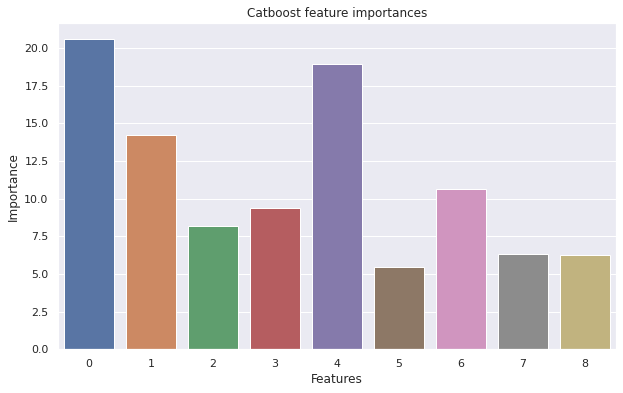

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot([x for x in range(len(feature_importance))], feature_importance)
plt.title("Catboost feature importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [ ]:
predictions_2 = catboost2.predict_proba(X_test)
predictions_2

array([[0.26181985, 0.73818015],
       [0.00723914, 0.99276086],
       [0.01259073, 0.98740927],
       ...,
       [0.00917659, 0.99082341],
       [0.04479191, 0.95520809],
       [0.0152862 , 0.9847138 ]])

In [ ]:
predictions_2s = catboost2.predict(X_test)
predictions_2s

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
catboost2.score(X_valid, y_valid)

0.955853931441359

### 12.5 Cuda

In [ ]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

In [ ]:
! add-apt-repository ppa:graphics-drivers/ppa
! apt update
! apt install nvidia-384 nvidia-384-dev
! apt-get install g++ freeglut3-dev build-essential libx11-dev libxmu-dev libxi-dev libglu1-mesa libglu1-mesa-dev

In [ ]:
! nvidia-smi

In [ ]:
!gcc -v

In [ ]:
!apt install gcc-6
!apt install g++-6

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1710-9-2-local_9.2.88-1_amd64

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/patches/1/cuda-repo-ubuntu1710-9-2-local-cublas-update-1_1.0-1_amd64

In [ ]:
!dpkg -i cuda-repo-ubuntu1710-9-2-local_9.2.88-1_amd64

In [ ]:
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub

In [ ]:
!apt-get update

In [ ]:
!apt-get install cuda

In [ ]:
!dpkg -i cuda-repo-ubuntu1710-9-2-local-cublas-update-1_1.0-1_amd64

In [ ]:
!ls

### 12.6 GPU

In [ ]:
params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': categorical_features,
          'task_type': 'GPU',
          'verbose': 200,
          'random_seed': 42
         }
catboost4 = CatBoostClassifier(**params)
catboost4.fit(X_train, y_train,
          eval_set=(X_valid, y_valid), 
          use_best_model=True,
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.05456
0:	learn: 0.6350269	test: 0.6450613	best: 0.6450613 (0)	total: 86.4ms	remaining: 1m 26s
200:	learn: 0.8534731	test: 0.8684987	best: 0.8684987 (200)	total: 14.6s	remaining: 58.1s
400:	learn: 0.8654211	test: 0.8704900	best: 0.8707295 (331)	total: 29.3s	remaining: 43.8s
600:	learn: 0.8700237	test: 0.8703724	best: 0.8708284 (495)	total: 43.8s	remaining: 29.1s
800:	learn: 0.8742143	test: 0.8707701	best: 0.8712023 (789)	total: 58.5s	remaining: 14.5s
999:	learn: 0.8791145	test: 0.8696387	best: 0.8712023 (789)	total: 1m 13s	remaining: 0us
bestTest = 0.8712023497
bestIteration = 789
Shrink model to first 790 iterations.


Adding GPU did not help very much here.

In [ ]:
params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': categorical_features,
          'task_type': 'GPU',
          'border_count': 20,
          'verbose': 200,
          'random_seed': 27
         }
catboost5 = CatBoostClassifier(**params)
catboost5.fit(X_train, y_train, 
          eval_set=(X_valid, y_valid), 
          use_best_model=True, 
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.05456
0:	learn: 0.6301150	test: 0.6111260	best: 0.6111260 (0)	total: 65.2ms	remaining: 1m 5s
200:	learn: 0.8532113	test: 0.8684250	best: 0.8684250 (200)	total: 14.6s	remaining: 57.9s
400:	learn: 0.8656113	test: 0.8723087	best: 0.8723623 (394)	total: 29.2s	remaining: 43.6s
600:	learn: 0.8727134	test: 0.8727783	best: 0.8729795 (529)	total: 44s	remaining: 29.2s
800:	learn: 0.8790881	test: 0.8734801	best: 0.8737477 (766)	total: 58.8s	remaining: 14.6s
999:	learn: 0.8832904	test: 0.8733965	best: 0.8737477 (766)	total: 1m 13s	remaining: 0us
bestTest = 0.8737477362
bestIteration = 766
Shrink model to first 767 iterations.


The best catboost model turned out to be the one with the early_stopping rounds.
The score turned out to be the best until now.


# 13. Selecting the best model

After building all the models, we see that the models are over-fitting for many of the models when we use default algorithms for modelling the data.
Models used:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. XGBoost
5. LightGBM

<br><br>
After this, used hyperparameter tuning to see if the models worked differently on the data. Used **RandomizedSearchCV** for fitting the Random Forest Classifier and XGBoost, but the results were not as expected. The tuned model of Random Forest worked better and gave much better results than the default model.
<br><br>
The Logistic Regression model worked well when the columns were one-hot encoded and gave much better results than before.
<br><br>
The LightGBM model did not work as expected, its accuracy was same as the other models and did not make any impact.
<br><br>
The CatBoost models worked the best. With the **Early Stopping Rounds** parameter used with **cross validation** made the best predictions and with the highest test accuracy.

# 14. Making Predictions

While training the models, we see that the test scores for the models built is over-fitting for many of the models that were chosen. The scores were best only for the **Randomized Search CV** with **Random Forest Classifier**.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from catboost import Pool
import numpy as np
from catboost import CatBoostClassifier

n_fold = 4 # amount of data folds
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=1)

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 1
         }

test_data = Pool(data=X_test,
                 cat_features=categorical_features)

scores = []
prediction = np.zeros(X_test.shape[0])
for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
    
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] # train and validation data splits
    y_train, y_valid = y[train_index], y[valid_index]

    train_data = Pool(data=X_train, 
                      label=y_train,
                      cat_features=categorical_features)
    valid_data = Pool(data=X_valid, 
                      label=y_valid,
                      cat_features=categorical_features)
    
    model = CatBoostClassifier(**params)
    model.fit(train_data,
              eval_set=valid_data, 
              use_best_model=True
             )
    
    score = model.get_best_score()['validation']['AUC']
    scores.append(score)

    y_pred = model.predict_proba(test_data)[:, 1]
    prediction += y_pred

prediction /= n_fold
print('CV mean: {:.4f}, CV std: {:.4f}'.format(np.mean(scores), np.std(scores)))

Learning rate set to 0.069882
0:	test: 0.5797111	best: 0.5797111 (0)	total: 59.5ms	remaining: 59.5s
200:	test: 0.8638646	best: 0.8638646 (200)	total: 12s	remaining: 47.6s
400:	test: 0.8690869	best: 0.8691354 (377)	total: 24.9s	remaining: 37.1s
600:	test: 0.8730484	best: 0.8730484 (600)	total: 37.9s	remaining: 25.2s
800:	test: 0.8761950	best: 0.8762080 (799)	total: 51s	remaining: 12.7s
999:	test: 0.8776169	best: 0.8777923 (993)	total: 1m 4s	remaining: 0us

bestTest = 0.8777923105
bestIteration = 993

Shrink model to first 994 iterations.
Learning rate set to 0.069883
0:	test: 0.5000000	best: 0.5000000 (0)	total: 20.2ms	remaining: 20.2s
200:	test: 0.8946113	best: 0.8947113 (198)	total: 11.9s	remaining: 47.2s
400:	test: 0.9000046	best: 0.9000046 (400)	total: 25s	remaining: 37.4s
600:	test: 0.9016458	best: 0.9017362 (584)	total: 38.3s	remaining: 25.4s
800:	test: 0.9014675	best: 0.9019713 (680)	total: 51.8s	remaining: 12.9s
999:	test: 0.8997288	best: 0.9019713 (680)	total: 1m 5s	remaining: 

In [ ]:
import pandas as pd

sub = pd.read_csv('/content/drive/MyDrive/amazon-employee-access-challenge/sampleSubmission.csv')
sub['Action'] = prediction
sub_name = 'submission5.csv'
sub.to_csv(sub_name, index=False)

print(f'Saving submission file as: {sub_name}')

Saving submission file as: submission5.csv


**Submission and Description**<br>
CatBoost with CV, Pool and StratifiedKFold.<br>

 Private Score | Public Score  |  
-------------- | --------------
  0.90862      |   0.91359

  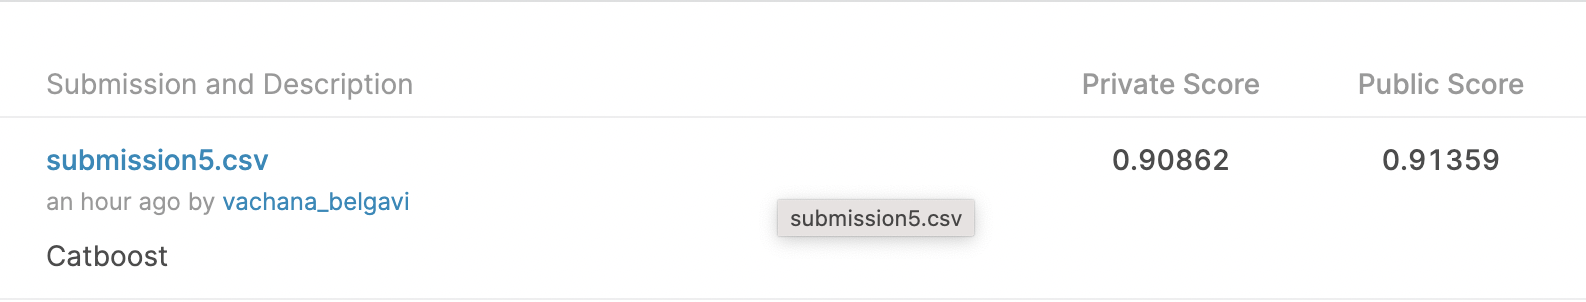


# 15. SHAP for Explainability

In [ ]:
!pip install shap

     |████████████████████████████████| 371 kB 28.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509250 sha256=878f5a879a1cba93e8fc892f63e5ea022074dfc564605a385d1ba020169019e3
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
import shap

### 15.1 Intialize the Tree SHAP Explainer

In [ ]:
explainer = shap.TreeExplainer(catboost5)
shap_values = explainer.shap_values(X_test)

### 15.2 Force plot of Local explanability

That's an interactive plot. We can analyse your model by switching parameters for both abscissa and ordinate. Keep in mind that it's made from the slice of the data (first 100 instances).

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1], X_test.iloc[1])

### 15.3 Summary Plot

Let us check summary plot:



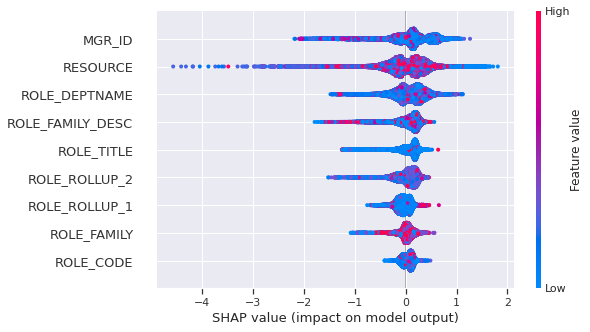

In [ ]:
shap.summary_plot(shap_values, X_test)

On the above diagram every employee (instance/row in our dataset) is represented by one dot in each row. The x position of the dot is the impact of that feature on the model’s prediction, and the color of the dot represents the value of that feature for that exact employee. Dots that do not fit on the row pile up to show density. Here we can see that 'ROLE_ROLLUP_1' and 'ROLE_CODE' features have low impact on the model prediction, and for most of employees their impact is almost zero.

  ### 15.4 SHAP Summary Plot - Global explanation

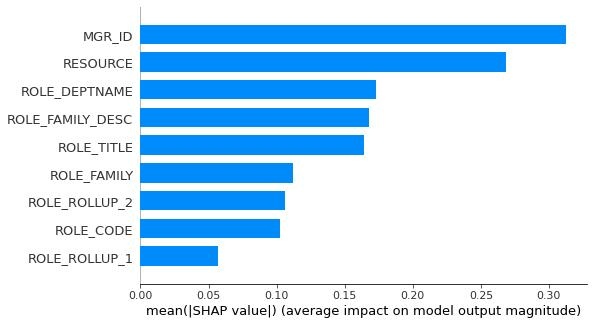

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

### 15.5 Decision Plot

**Local Explainability**

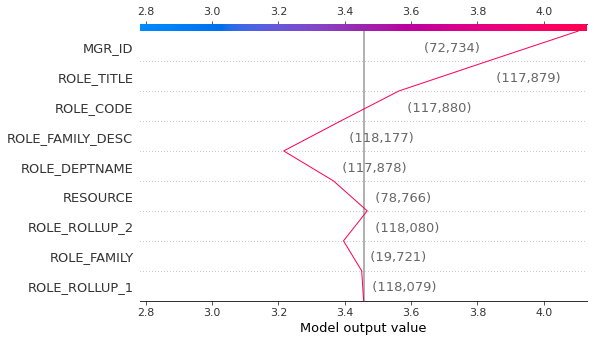

In [ ]:
expected_value = explainer.expected_value
r = shap.decision_plot(expected_value, shap_values[1], X_test, return_objects=True)

From the local explainability, MGR_ID has the most impact on the model and prediction.


# 16. Conclusion

The target of this notebook is to predict the **ACTION** feature to know if the Employee is allowed access or denied to the resources. This was carried out using many models. But, the best results were obtained when used a catboost model with cross validation. The test accuracy obtained is 0.9135 as per the Kaggle submission.

# 17. Kaggle Competition Score

Currently stand in top 10% on the leaderboard.

# 18. Public kernels vs notebook

On the public kernels, the competitor have mainly used catboost who stand at the top in the leaderboard and catboost proves to give out the best results.
<br>
I have used **column transformation** with one-hot encoding on all the features of the dataset and bulit a **Logistic Regression** model on it and that have better results as compared to all other models I have used. 
<br>But the best one turned out to be **Catboost Classifier**.

# 19. References
                                                                                

* [Exploratory Data Analysis](https://medium.com/analytics-vidhya/amazon-employee-access-challenge-e23fa2a1ddc2)
* [SHAP by Abhishek Maheshwarappa](https://colab.research.google.com/drive/1p9yZEEDbWGmWZP6yNKupmLzxTaiz0R39#scrollTo=tXUDTdoPxVKF)
* [Amazon Employee Access Challenge Dataset](https://www.kaggle.com/c/amazon-employee-access-challenge/overview)
* [Mapping and LightGBM](https://www.kaggle.com/germanaguirre/lightgbm-regressor)
* [Gradient Boosting, XGBoost, CatBoost](https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/)
* [Data Normalization](https://www.journaldev.com/45109/normalize-data-in-python)
* [Hyperparameter Tuning](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
* [ROC AUC](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

# 20. License

Copyright 2021 Vachana Satish Belgavi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.